In [1]:
import pandas
import numpy as np

development = pandas.read_csv("./../../DSL_Winter_Project_2024/development.csv")

pmax_features = []
negpmax_features = []
tmax_features = []
area_features = []
rms_features = []

for i in range(0, 18):
    pmax_features.append("pmax[%s]" % (i))
    negpmax_features.append("negpmax[%s]" % (i))
    tmax_features.append("tmax[%s]" % (i))
    area_features.append("area[%s]" % (i))
    rms_features.append("rms[%s]" % (i))

all_features= pmax_features + negpmax_features + tmax_features + area_features + rms_features

In [2]:
# integrate_features is the Euclidean norm of these five features to measure the combined impact of the five feature values
integrate_features=[]
for i in range(18):
    integrate_df=np.sqrt(np.sum(development[['pmax[%s]' % i, 'negpmax[%s]' % i, 'tmax[%s]' % i, 'area[%s]' % i, 'rms[%s]' % i]]**2, axis=1))
    development["Integrate[%s]" % i] = integrate_df
    integrate_features.append("Integrate[%s]" % i)


In [3]:
for i in range(18):
    print(development[['pmax[%s]' % i, 'negpmax[%s]' % i, 'tmax[%s]' % i,'area[%s]' % i, 'rms[%s]' % i, 'Integrate[%s]' % i]].corr())
    print('-----------------')

               pmax[0]  negpmax[0]   tmax[0]   area[0]    rms[0]  Integrate[0]
pmax[0]       1.000000    0.018335  0.011206  0.327321  0.010996      0.013240
negpmax[0]    0.018335    1.000000  0.006887  0.023052 -0.003504     -0.245935
tmax[0]       0.011206    0.006887  1.000000  0.022349 -0.060925      0.966826
area[0]       0.327321    0.023052  0.022349  1.000000 -0.005608      0.030327
rms[0]        0.010996   -0.003504 -0.060925 -0.005608  1.000000     -0.055501
Integrate[0]  0.013240   -0.245935  0.966826  0.030327 -0.055501      1.000000
-----------------
               pmax[1]  negpmax[1]   tmax[1]   area[1]    rms[1]  Integrate[1]
pmax[1]       1.000000   -0.286278 -0.130146  0.938971 -0.002381      0.138440
negpmax[1]   -0.286278    1.000000  0.024858 -0.262689  0.000131     -0.696585
tmax[1]      -0.130146    0.024858  1.000000 -0.132585 -0.027100      0.696876
area[1]       0.938971   -0.262689 -0.132585  1.000000 -0.004428      0.124114
rms[1]       -0.002381    0.000131

# According to the relationship between pmax and area, 0 7 12 15 16 17 are outliers

# According to the relationship between integrate and negpmax, 0 6 14 15 16 17 are outliers

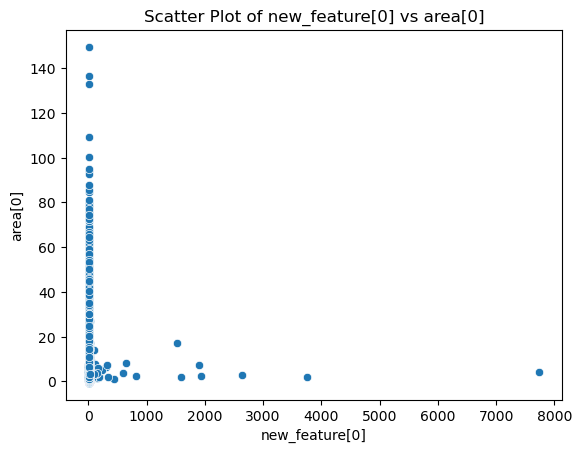

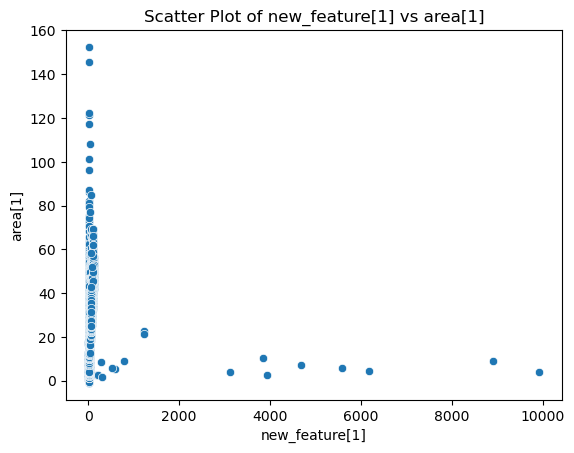

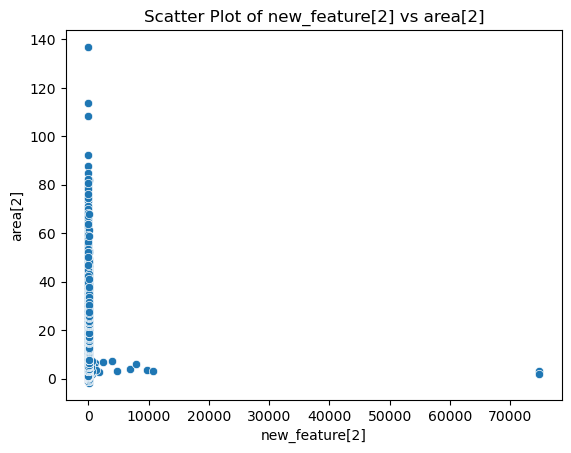

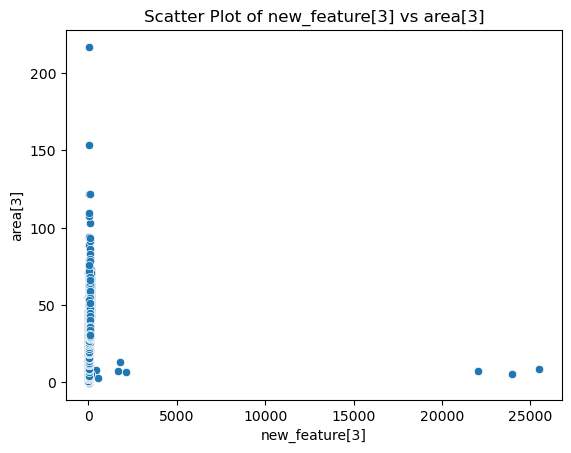

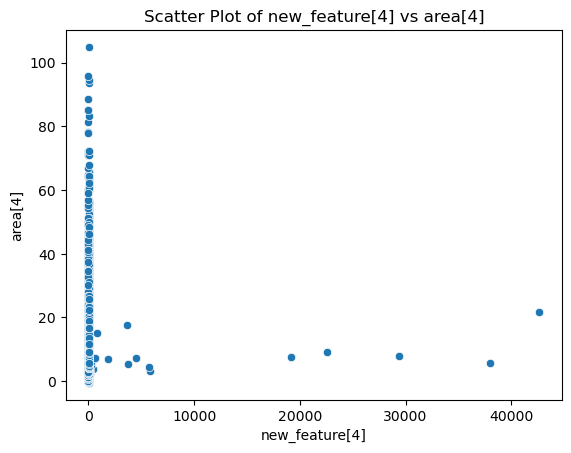

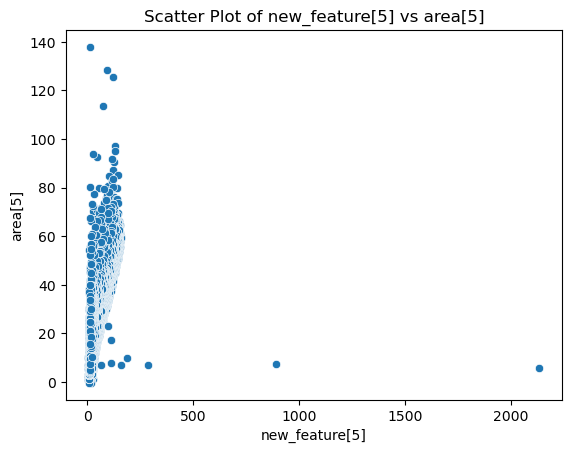

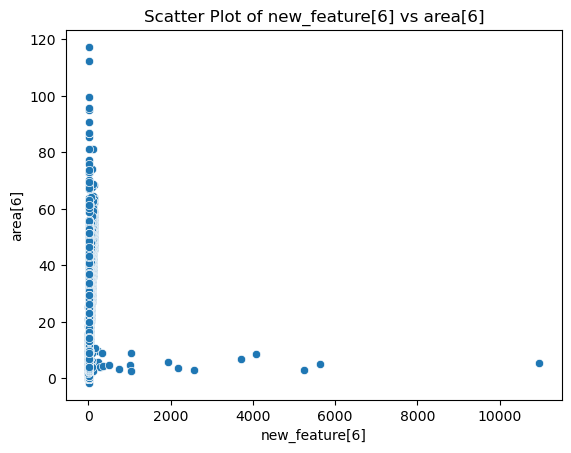

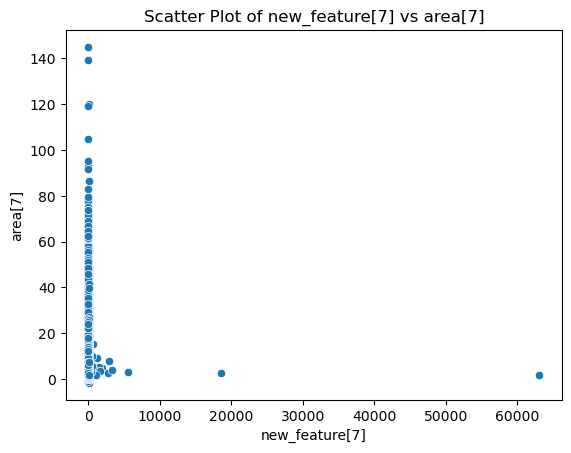

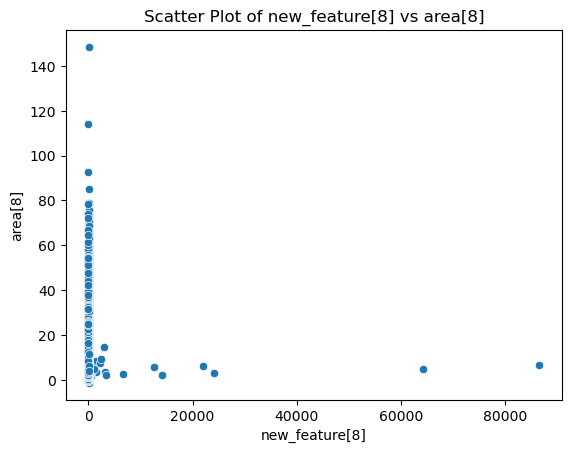

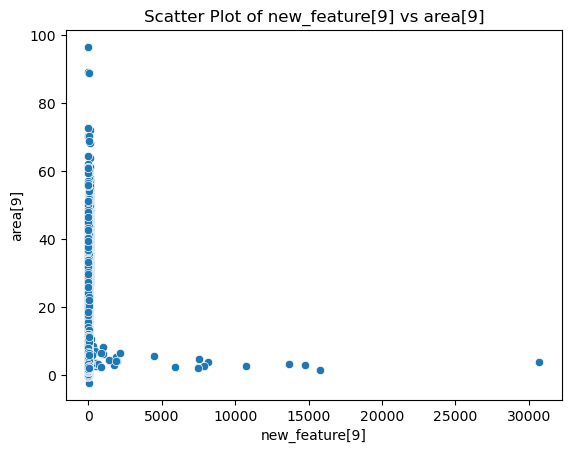

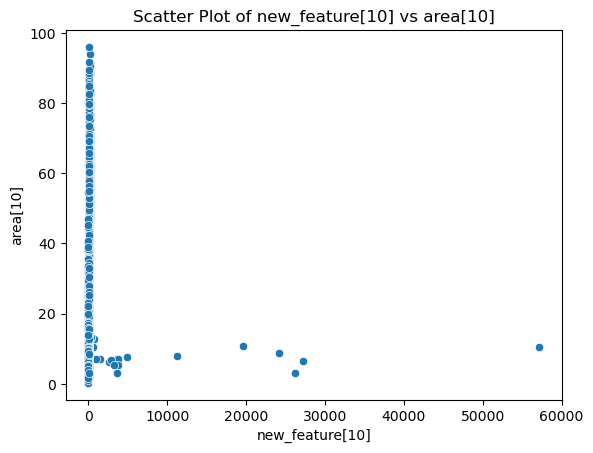

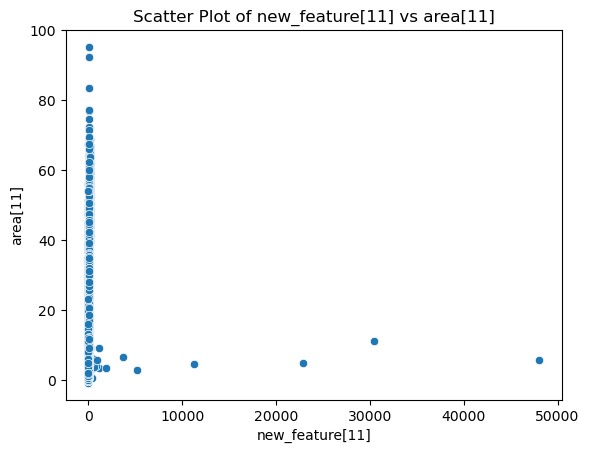

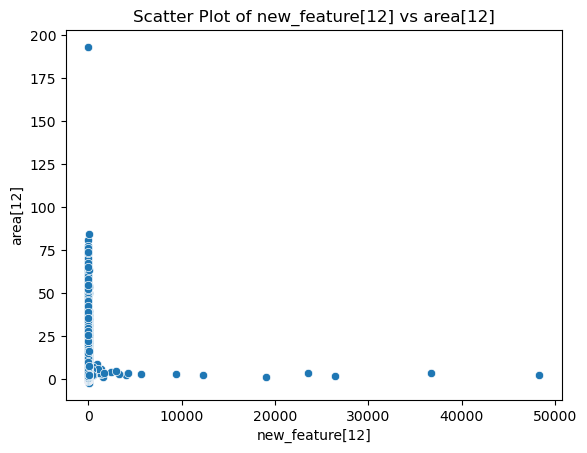

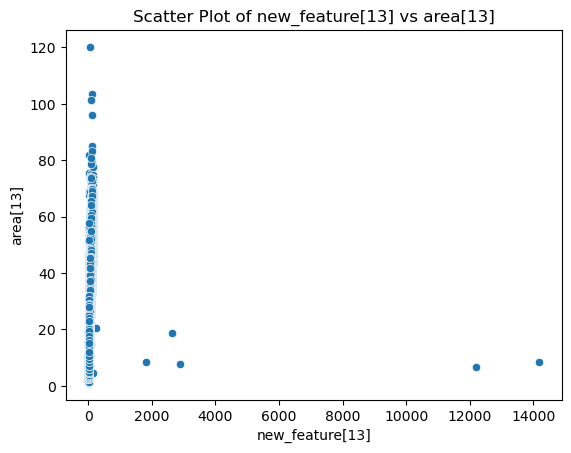

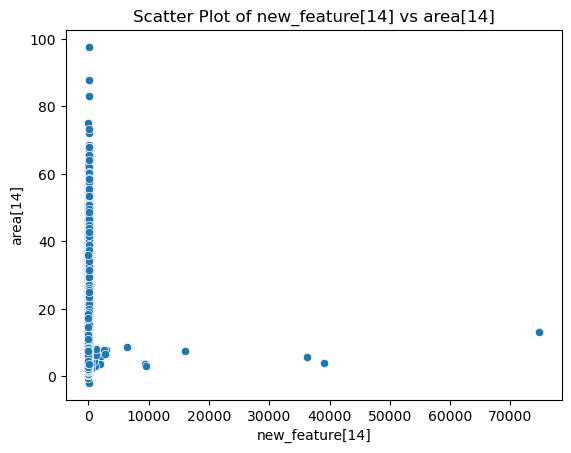

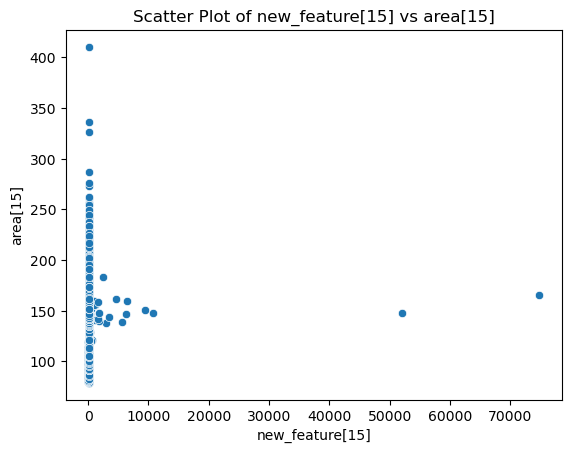

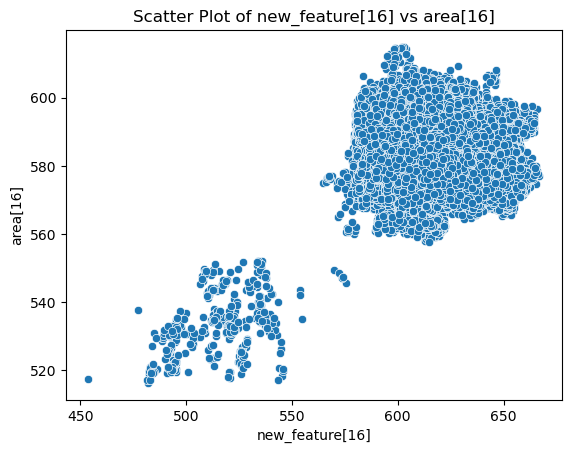

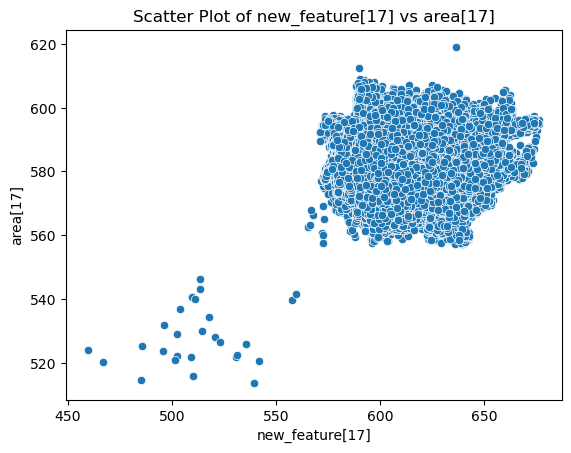

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# explore the impact of the synthetic features of pmax and negpmax on area
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['pmax[%s]' % i, 'negpmax[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['area[%i]' % i]))
    sns.scatterplot(x='new_feature[%s]' % i, y='area[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs area[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('area[%s]' % i)

    plt.show()

# from above 5 16 17

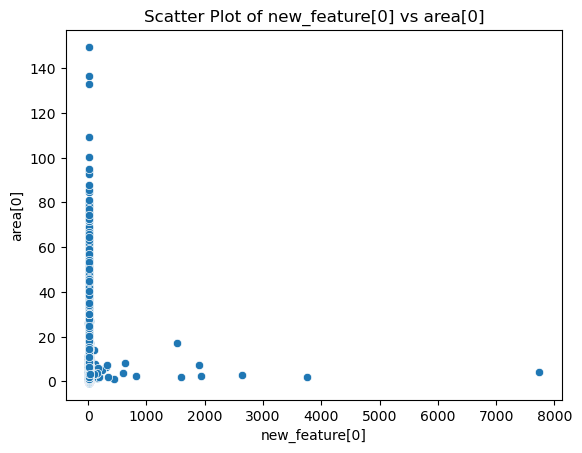

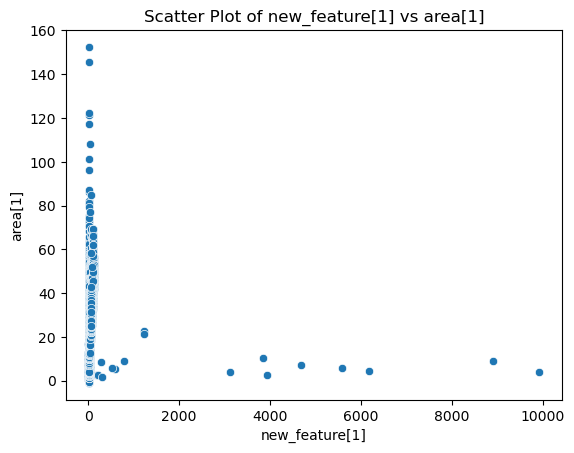

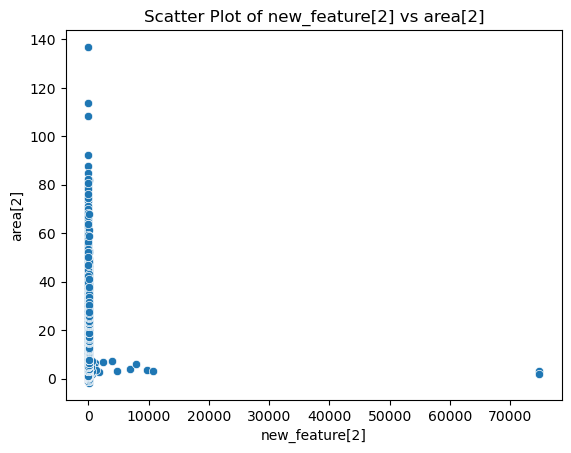

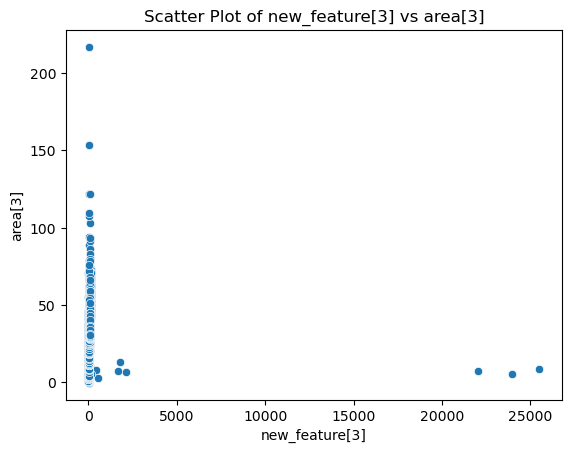

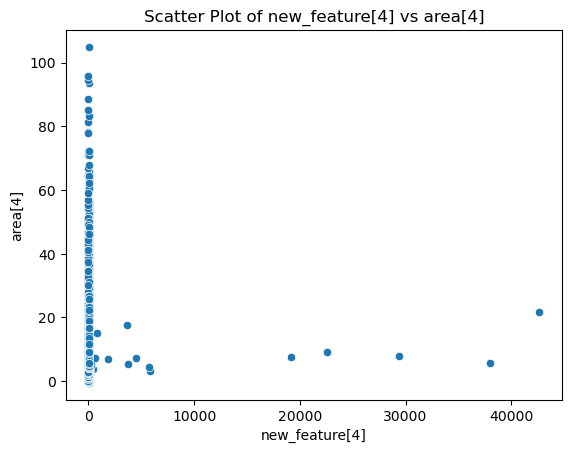

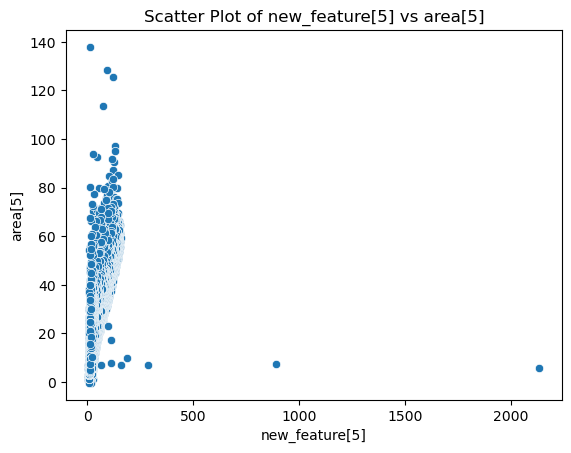

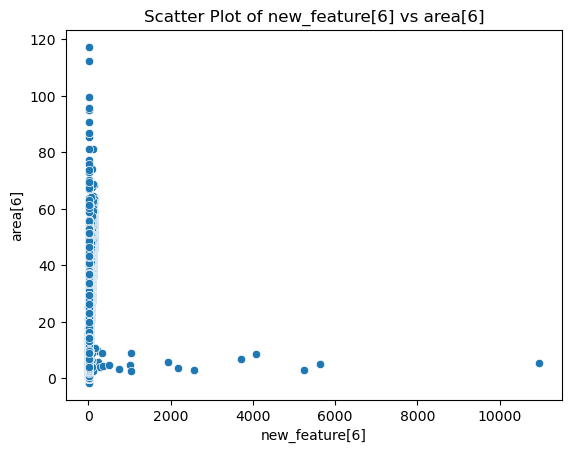

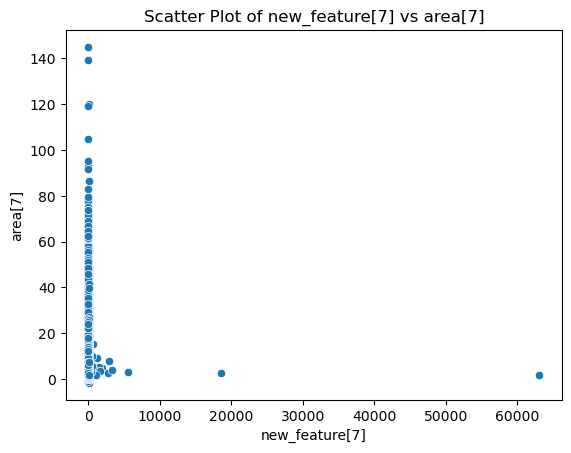

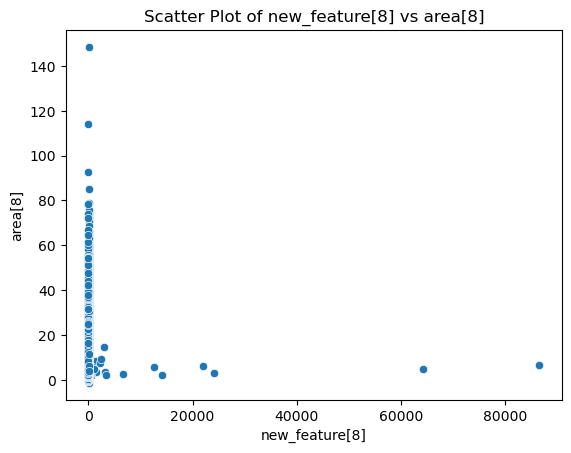

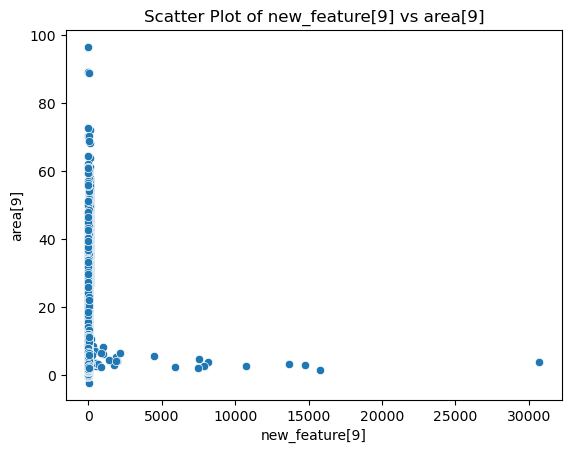

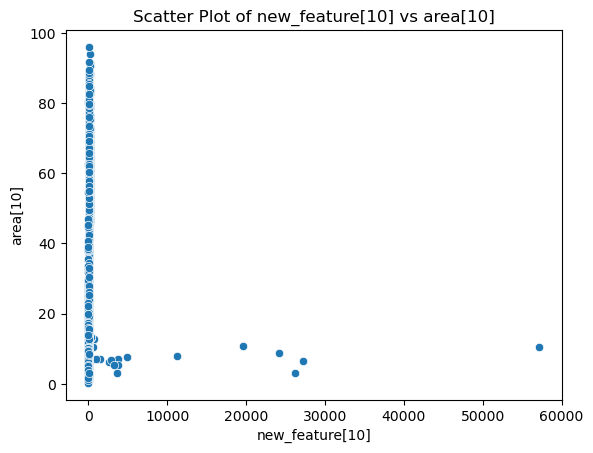

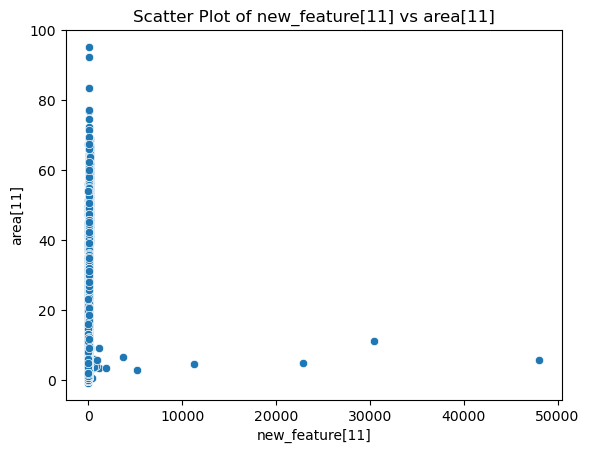

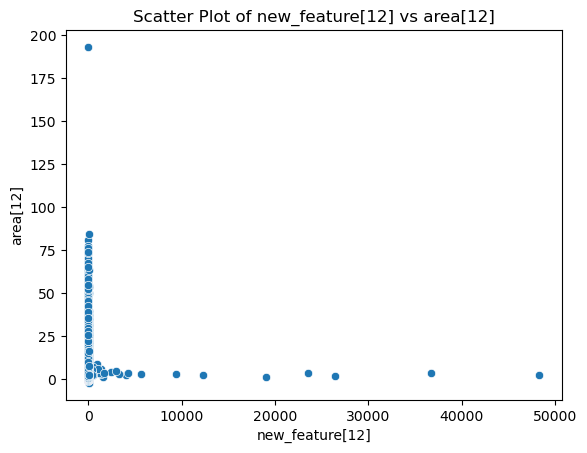

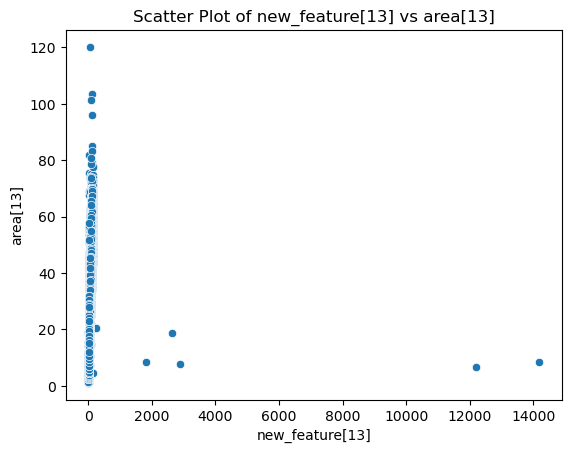

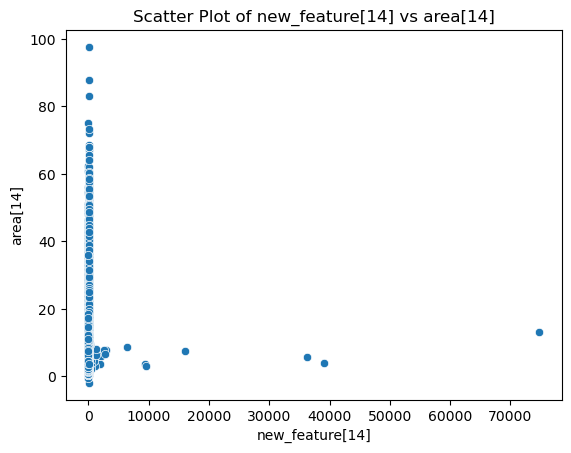

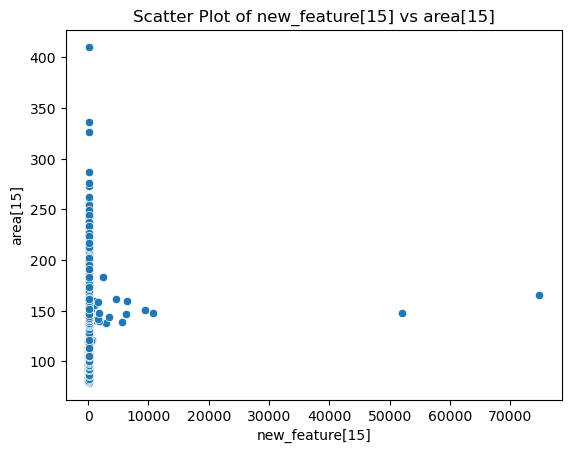

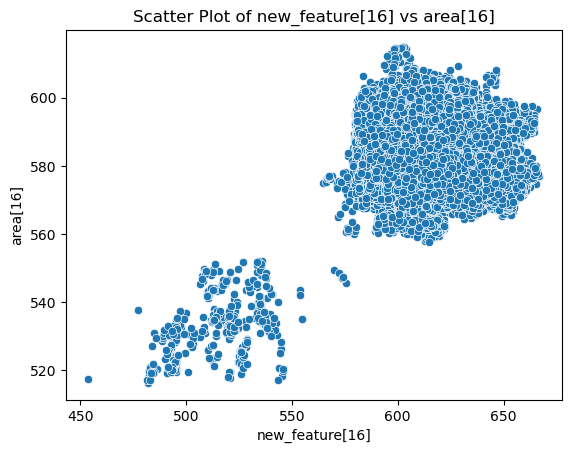

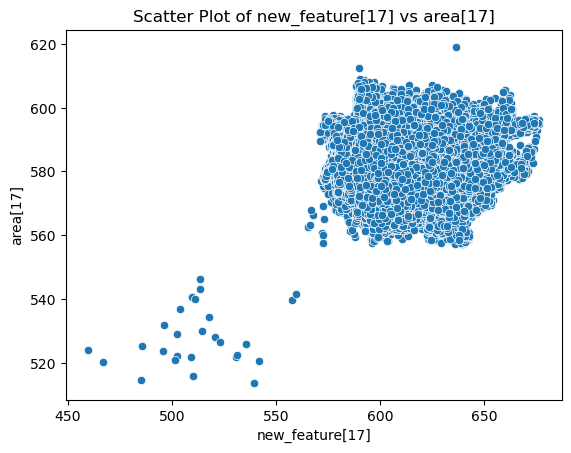

In [10]:
# explore the impact of the synthetic features of pmax, negpmax and rms on area
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['pmax[%s]' % i, 'negpmax[%s]' % i,  'rms[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['area[%i]' % i]))

    sns.scatterplot(x='new_feature[%s]' % i, y='area[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs area[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('area[%s]' % i)

    plt.show()

# from above 5,16,17

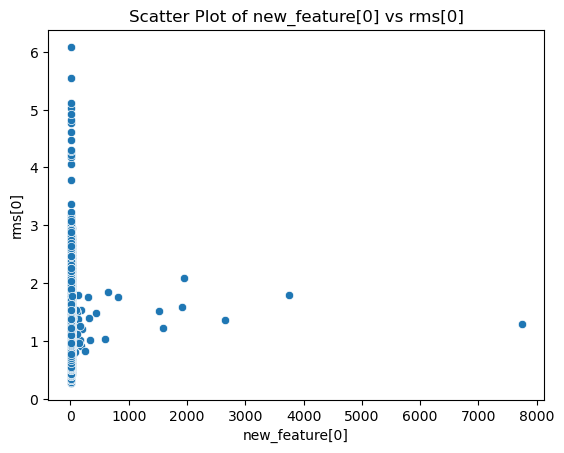

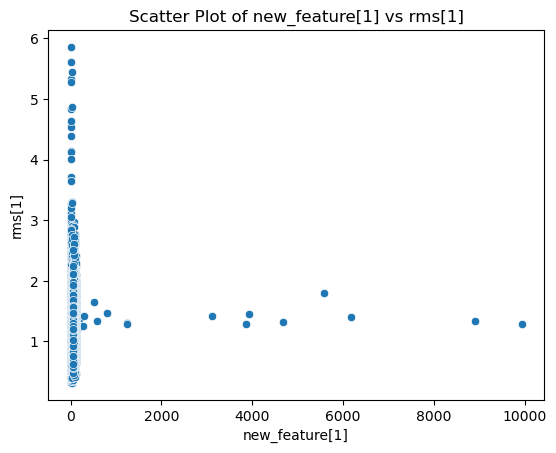

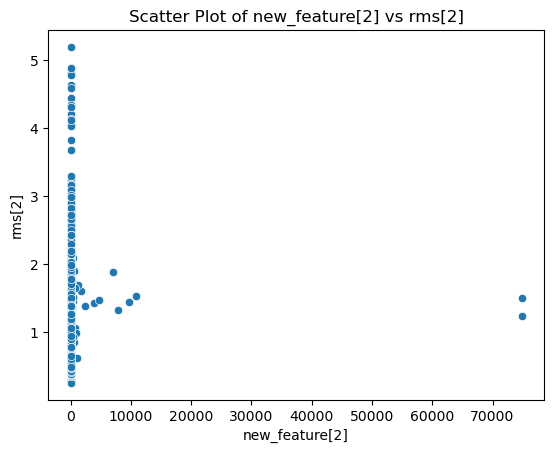

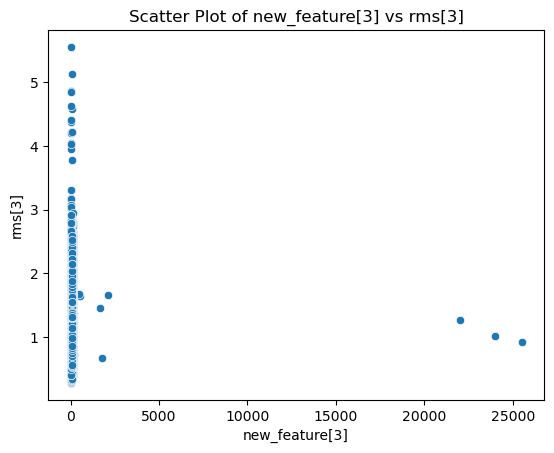

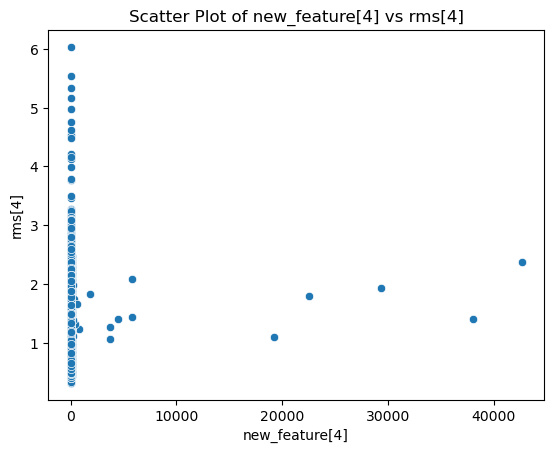

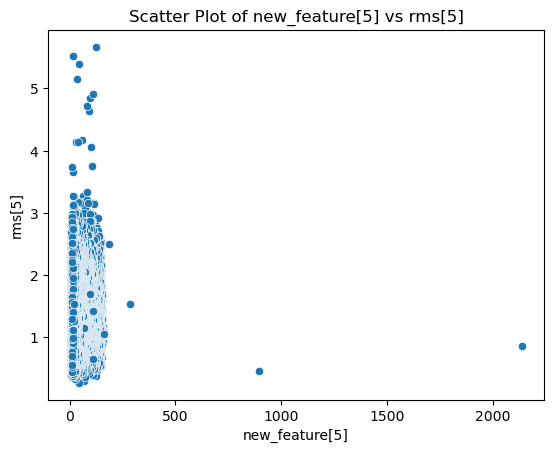

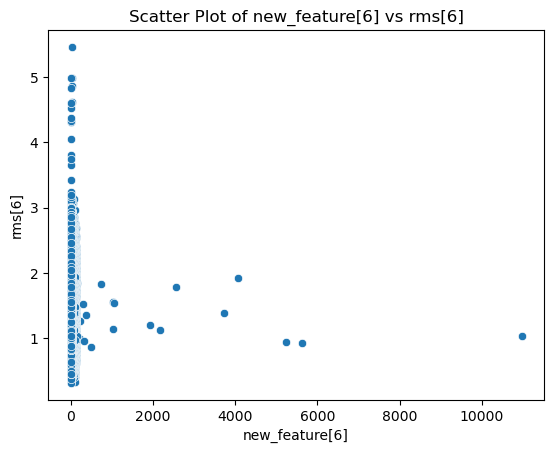

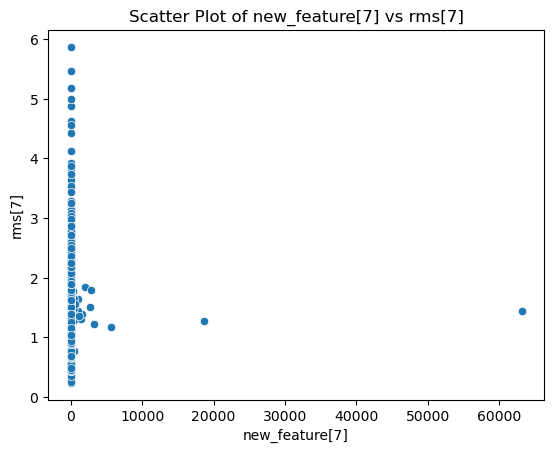

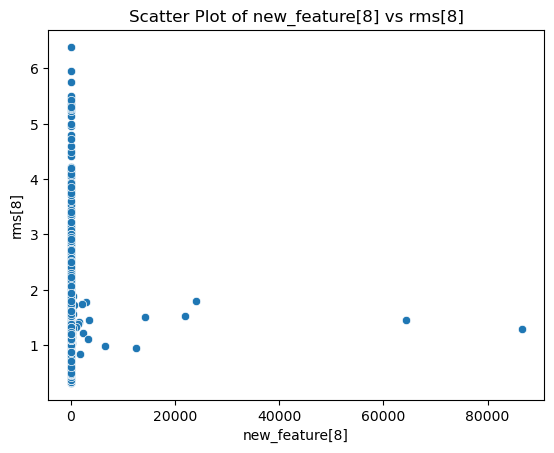

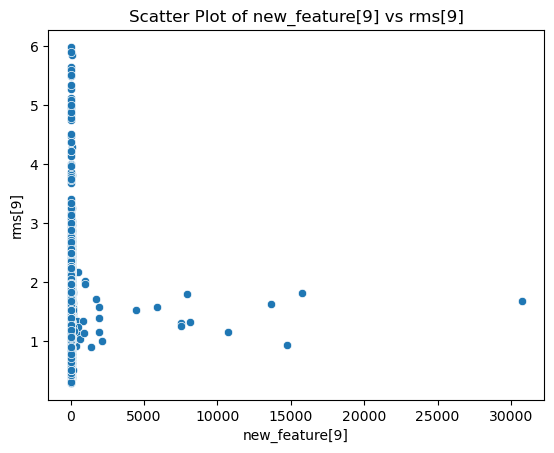

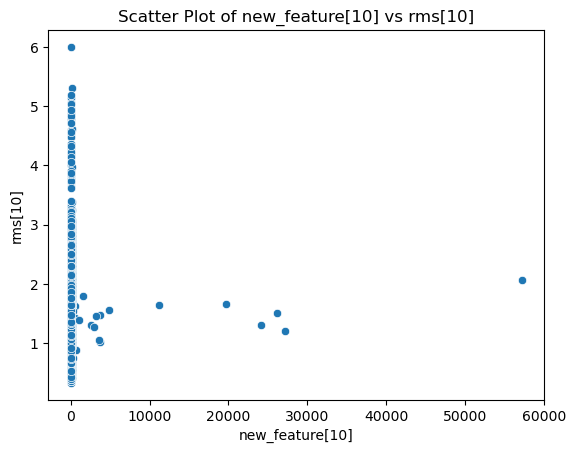

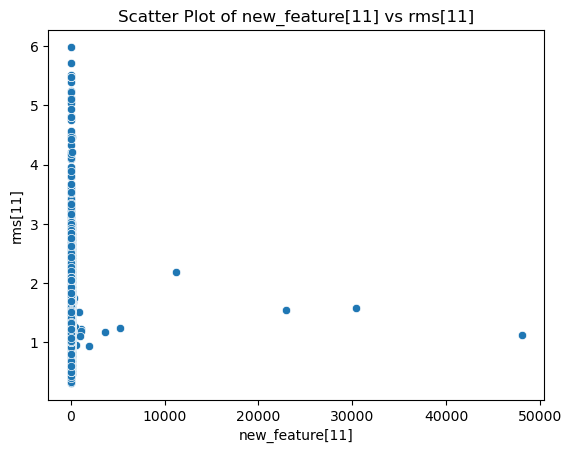

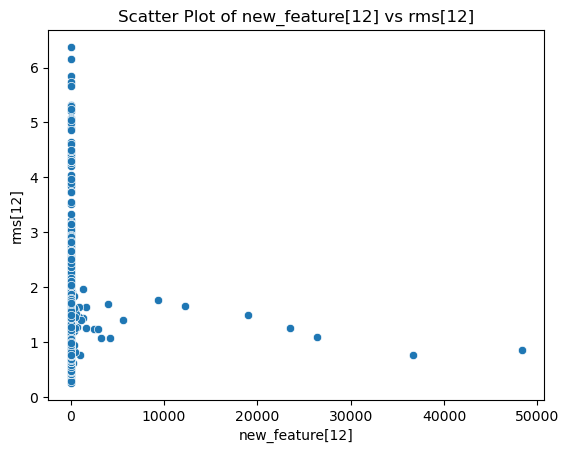

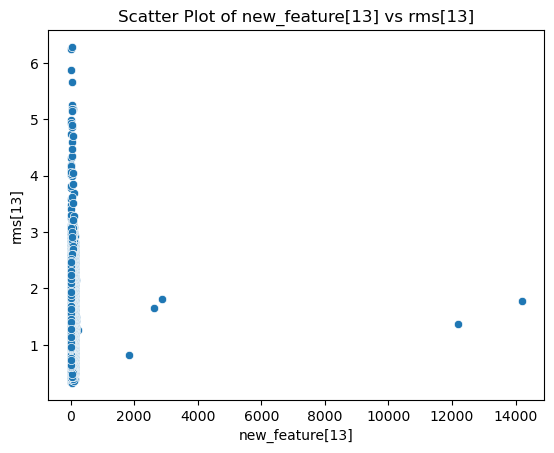

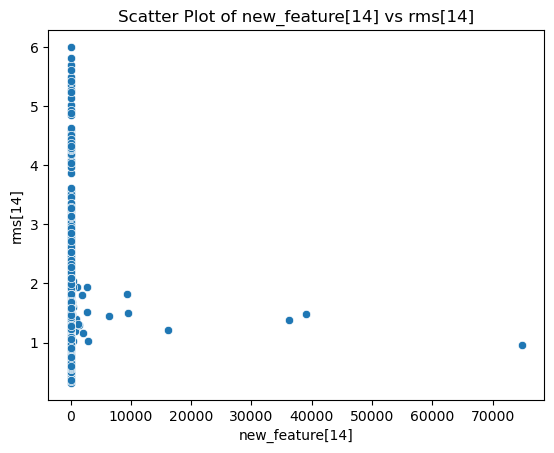

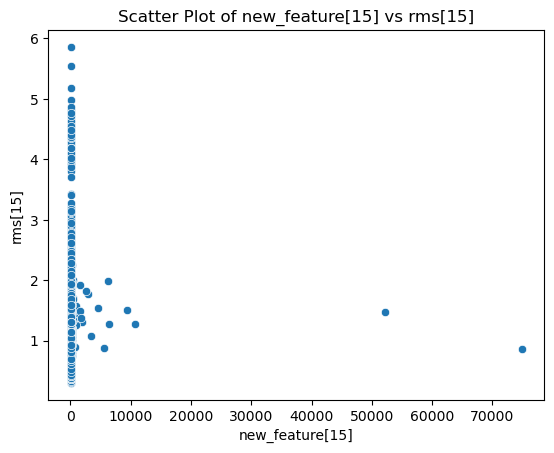

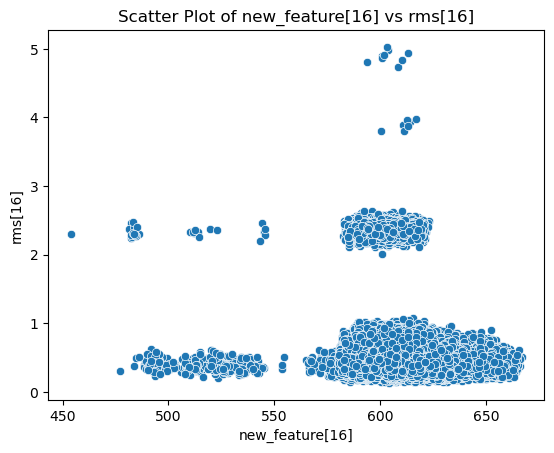

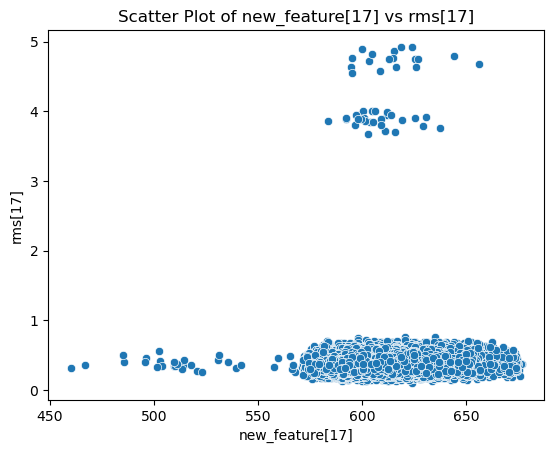

In [7]:
# explore the impact of the synthetic features of pmax and negpmax on rms
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['pmax[%s]' % i, 'negpmax[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['rms[%i]' % i]))

    sns.scatterplot(x='new_feature[%s]' % i, y='rms[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs rms[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('rms[%s]' % i)

    plt.show()

# from above 5,16,17

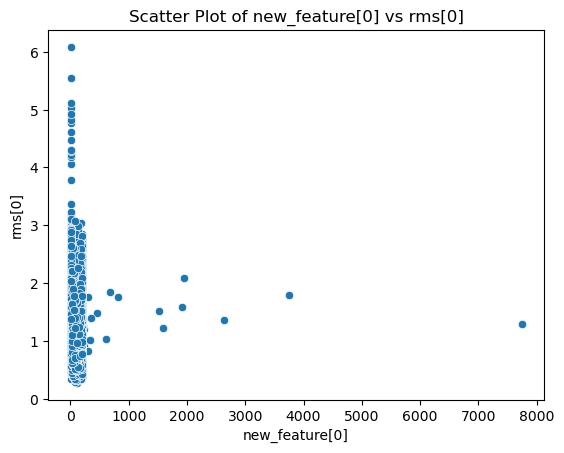

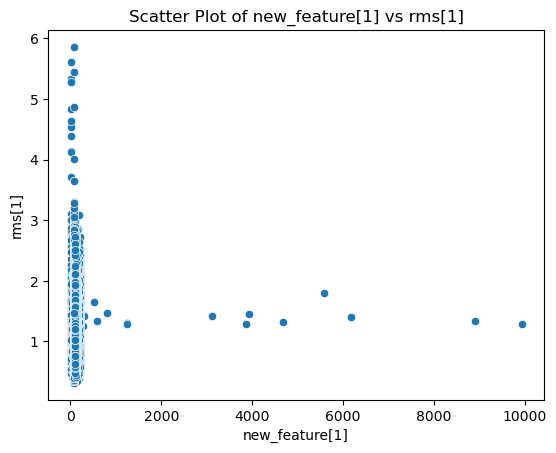

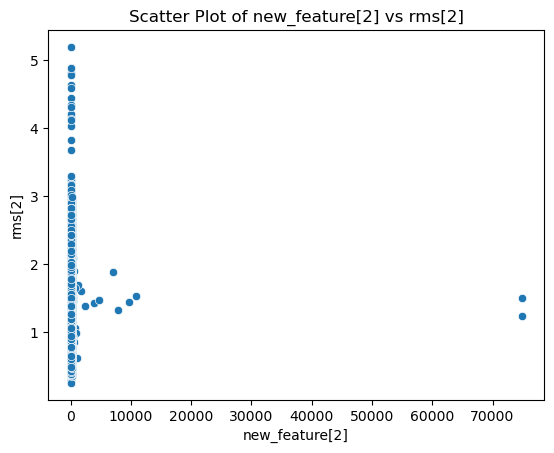

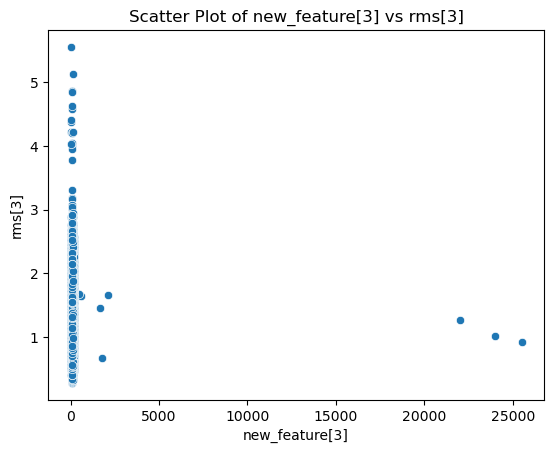

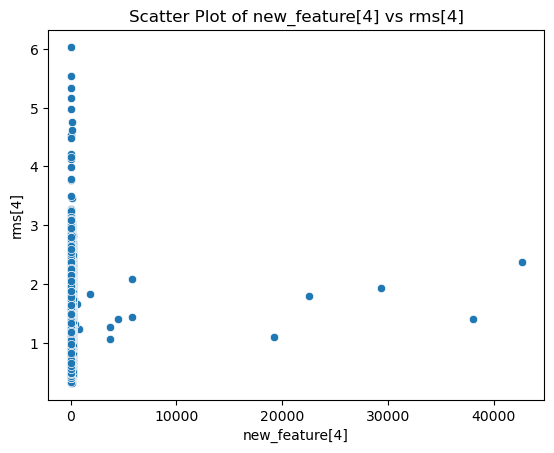

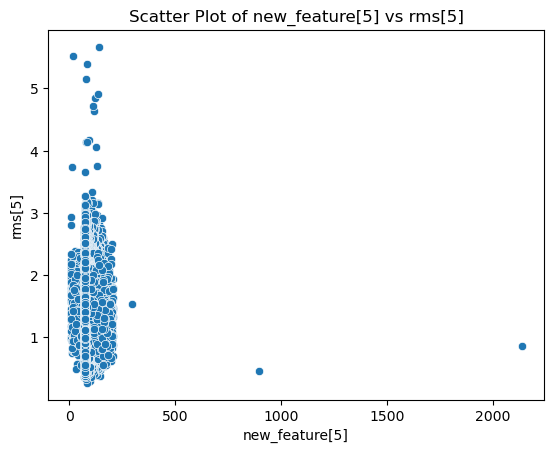

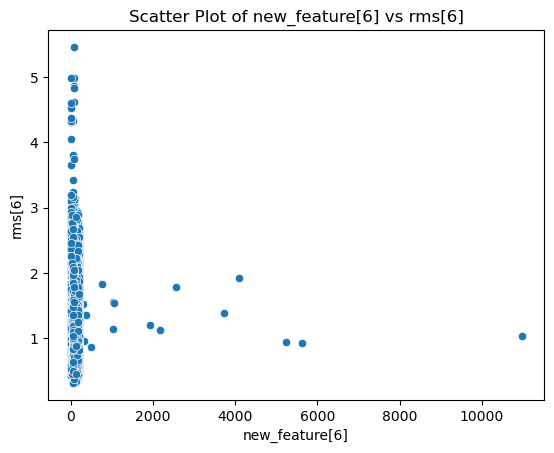

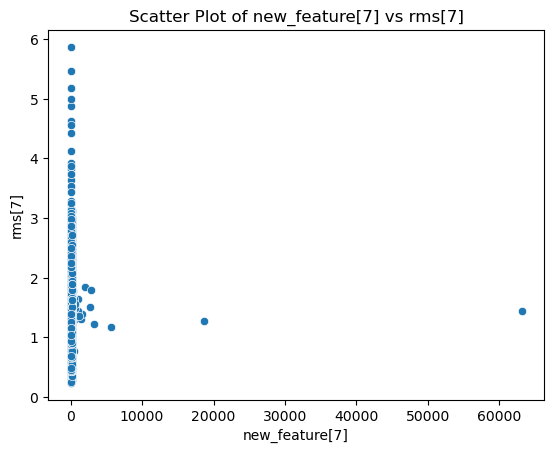

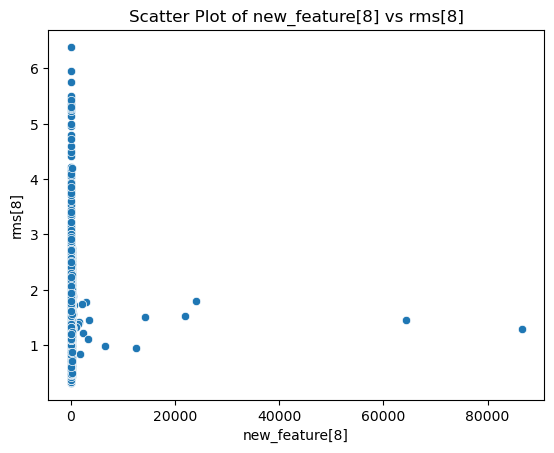

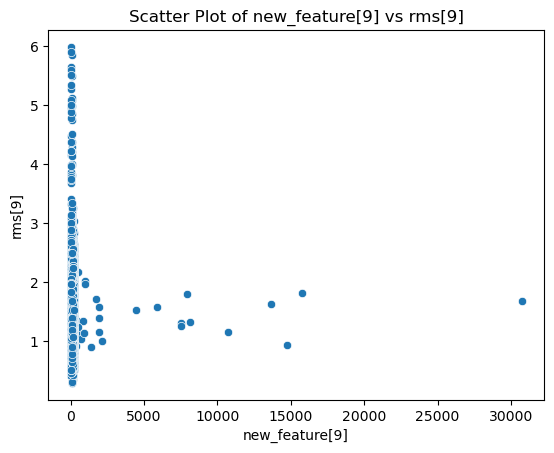

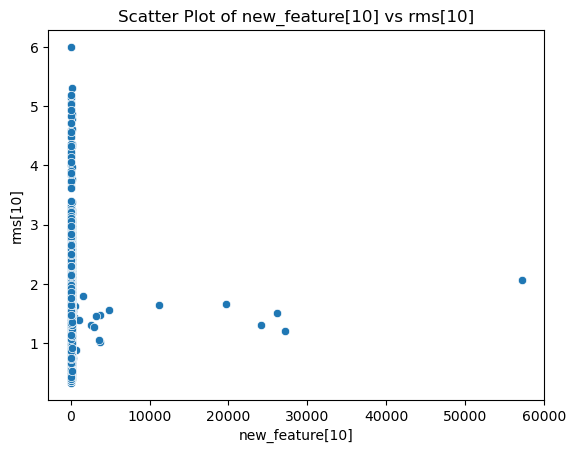

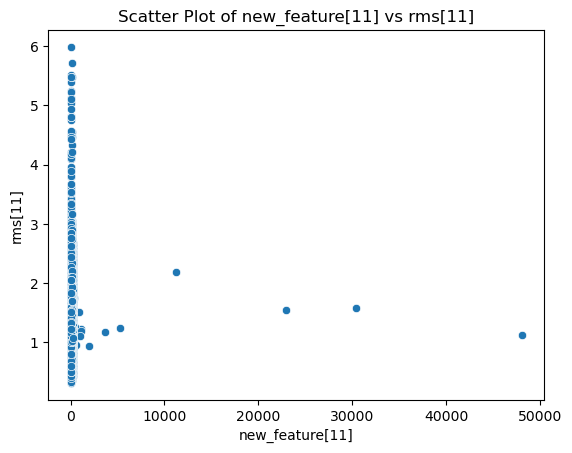

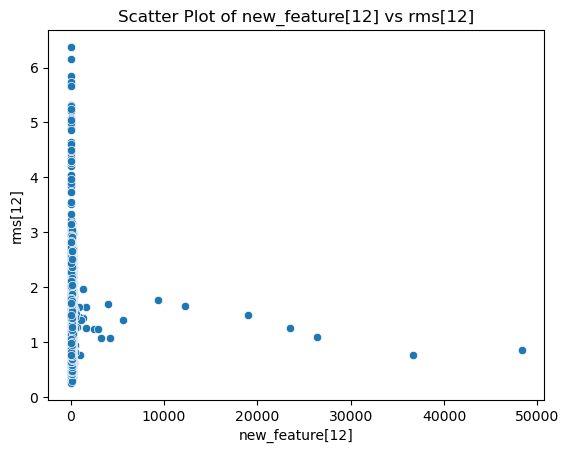

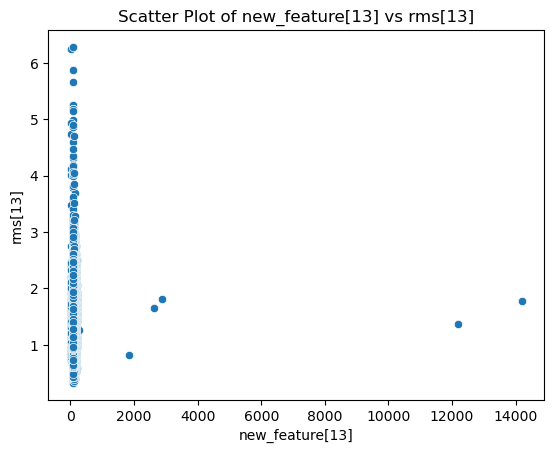

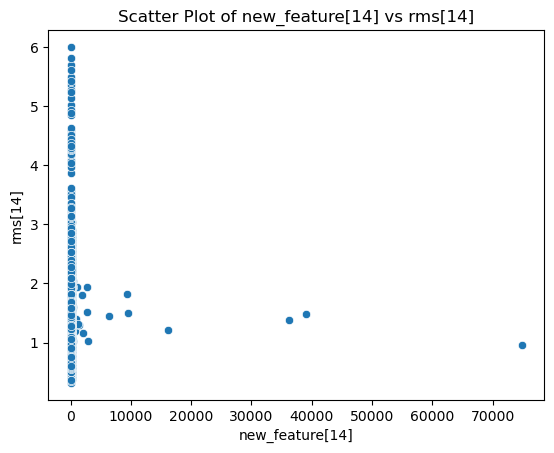

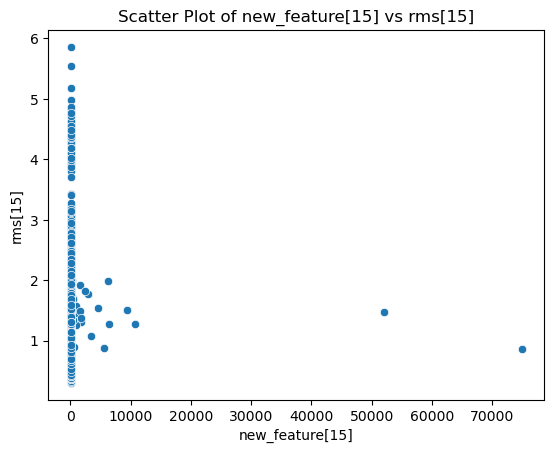

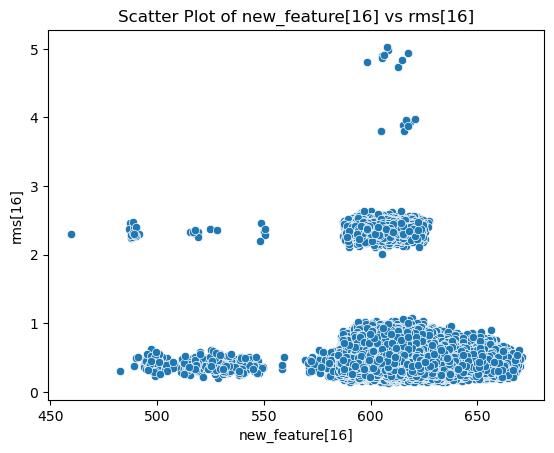

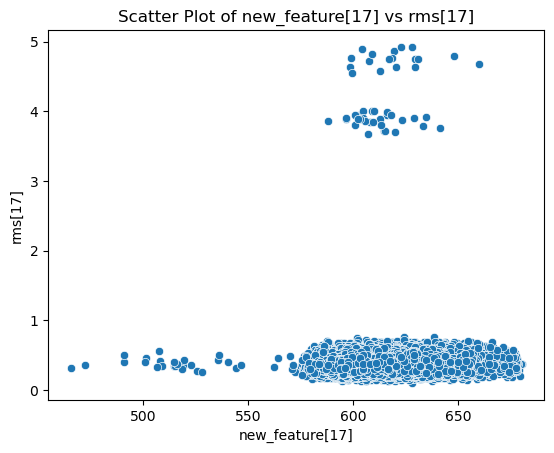

In [11]:
# explore the impact of the synthetic features of pmax, negpmax and tmax on rms
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['pmax[%s]' % i, 'negpmax[%s]' % i, 'tmax[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['rms[%i]' % i]))
    sns.scatterplot(x='new_feature[%s]' % i, y='rms[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs rms[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('rms[%s]' % i)

    plt.show()
    

# from above 5,6,16,17

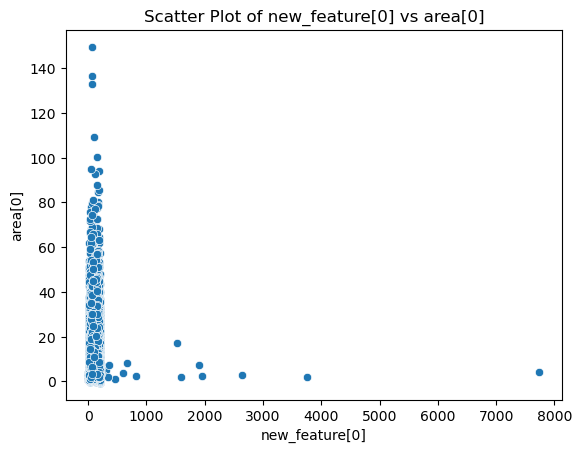

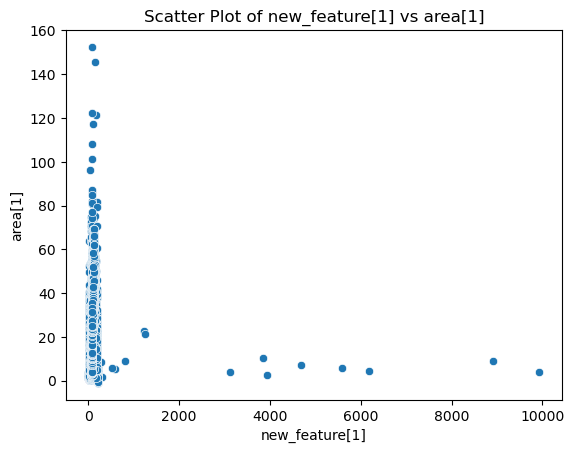

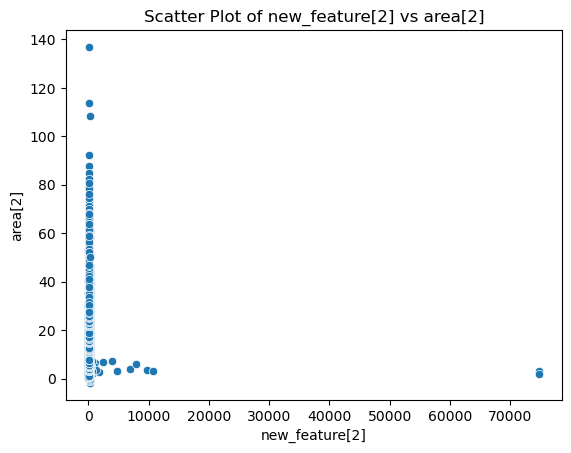

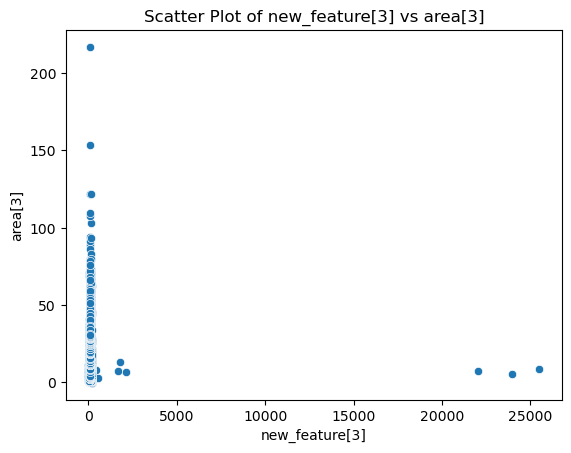

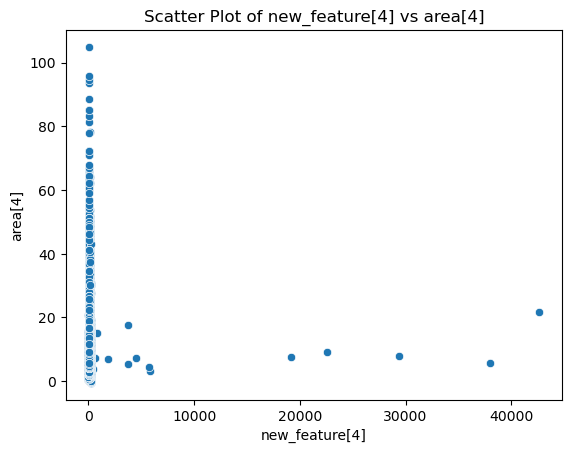

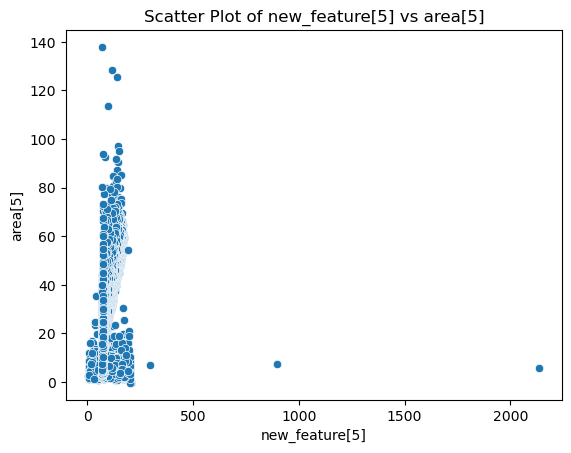

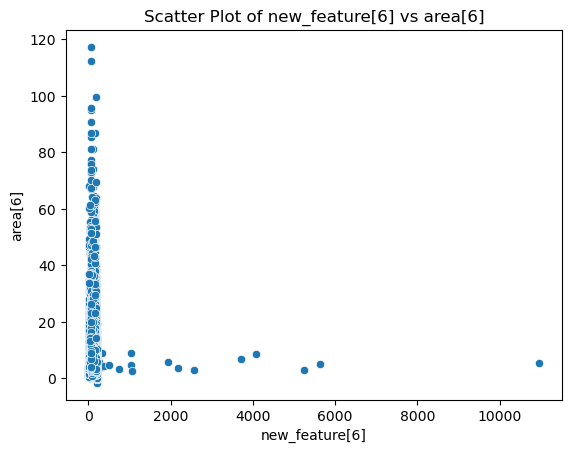

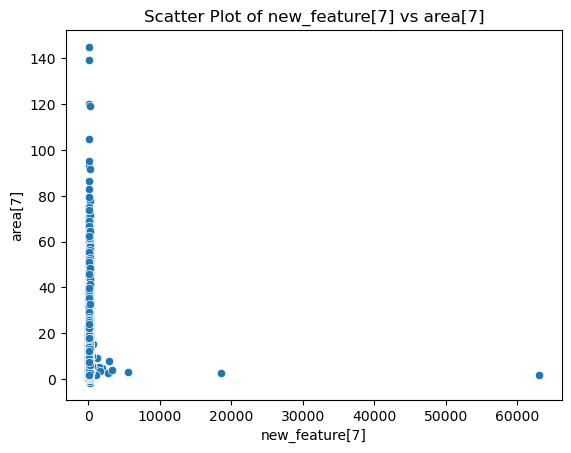

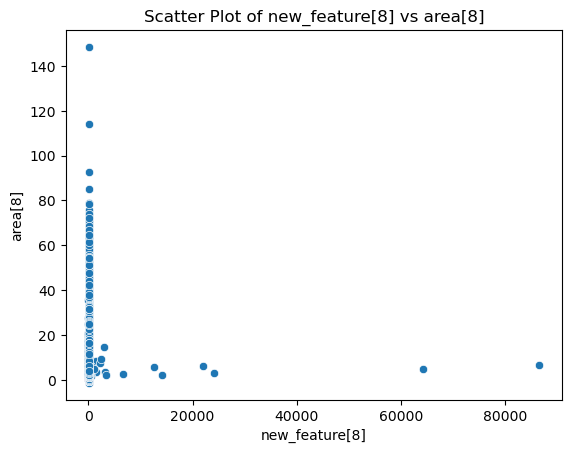

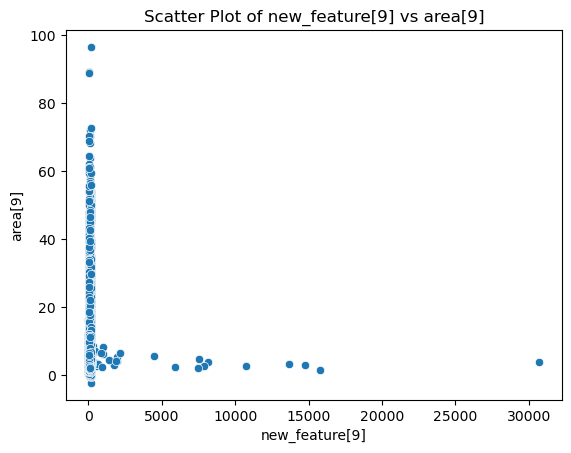

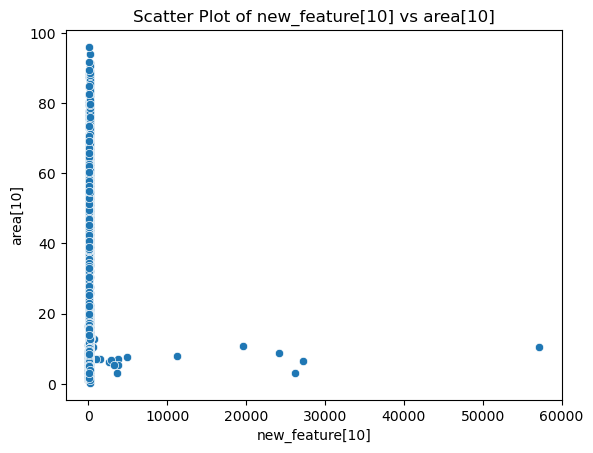

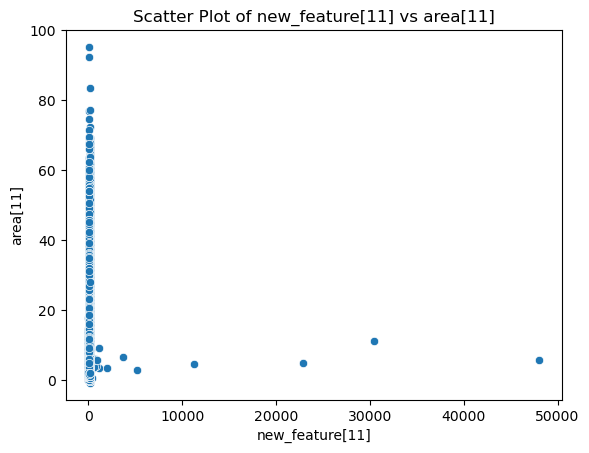

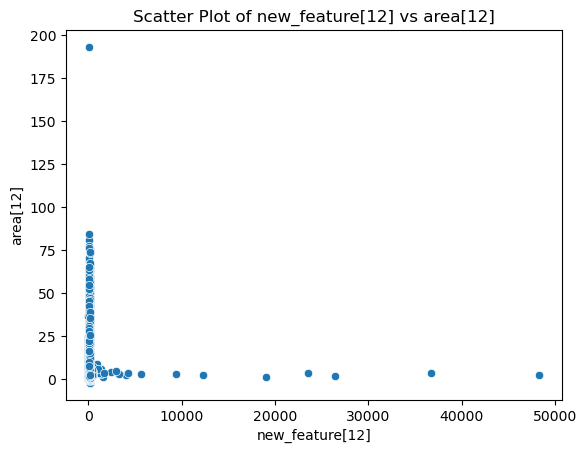

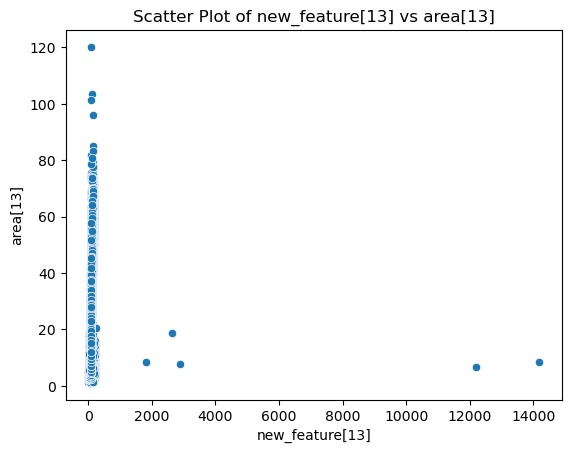

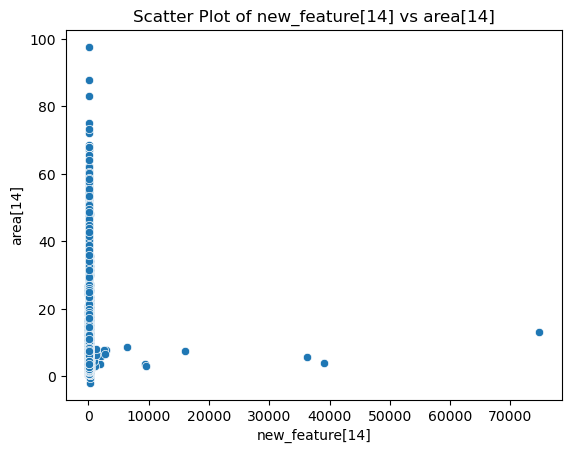

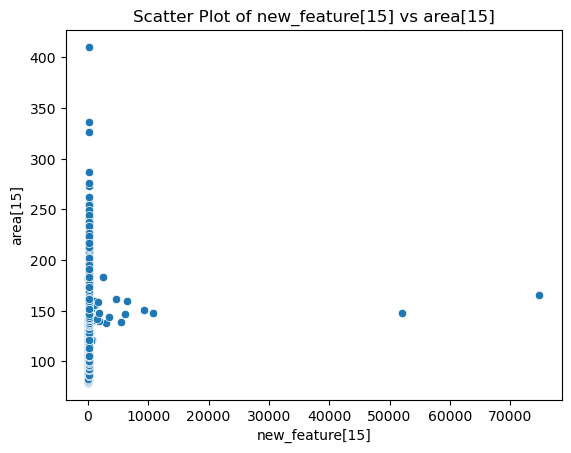

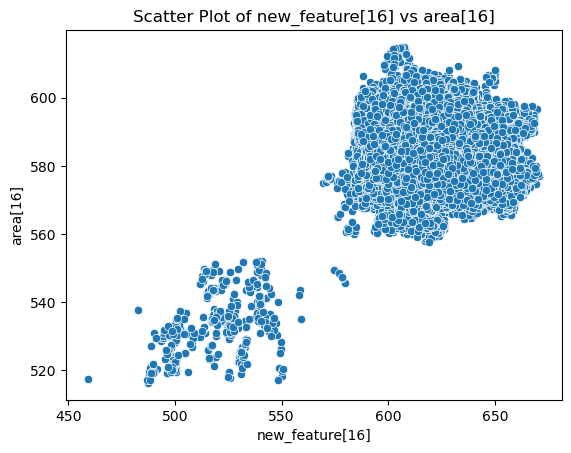

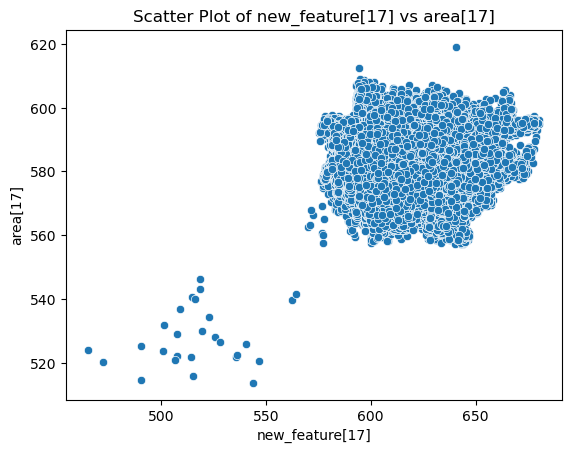

In [12]:
# explore the impact of the synthetic features of pmax, negpmax and tmax on area
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['pmax[%s]' % i, 'negpmax[%s]' % i, 'tmax[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['area[%i]' % i]))
    sns.scatterplot(x='new_feature[%s]' % i, y='area[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs area[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('area[%s]' % i)

    plt.show()
    

# from above 0,5,6,16,17

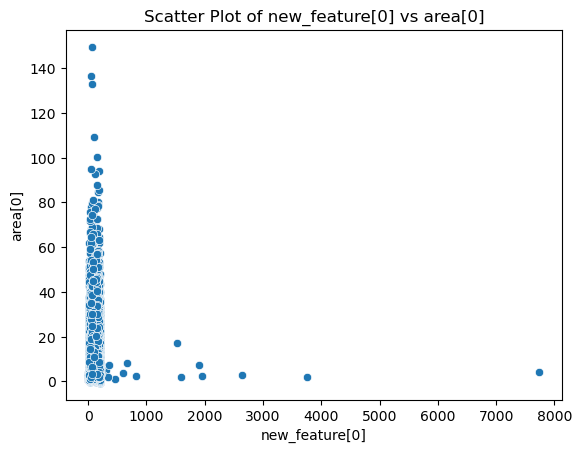

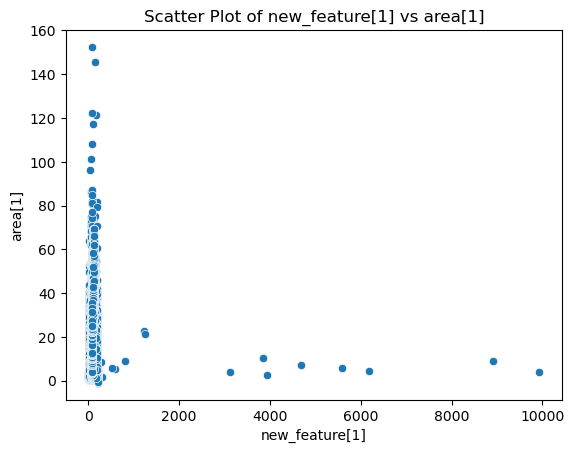

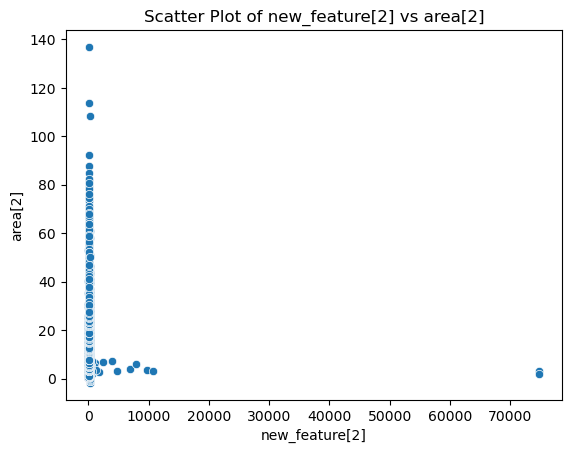

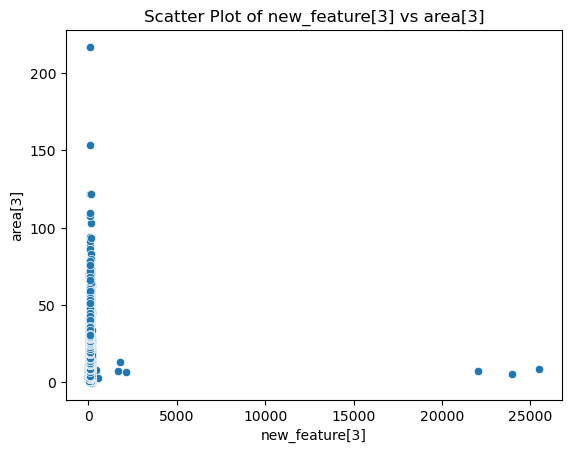

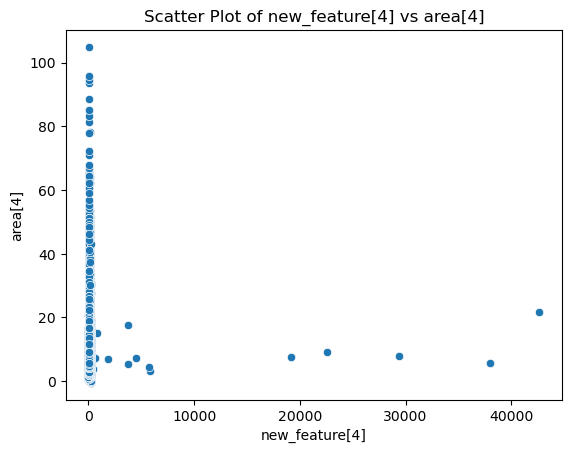

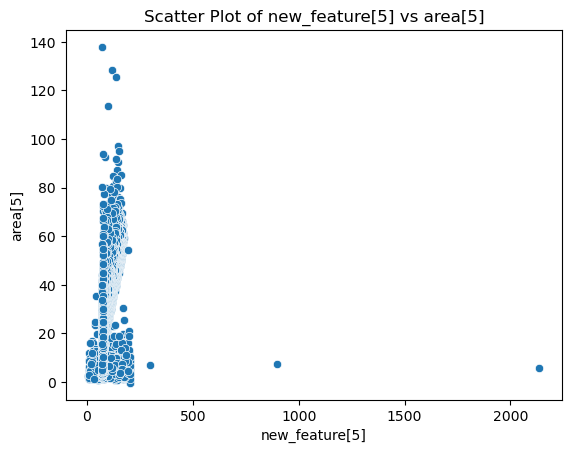

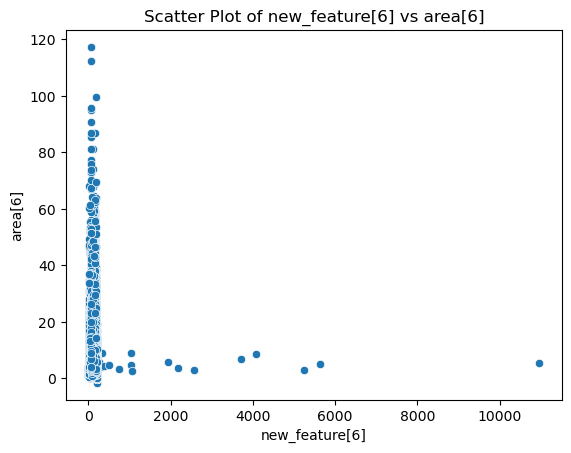

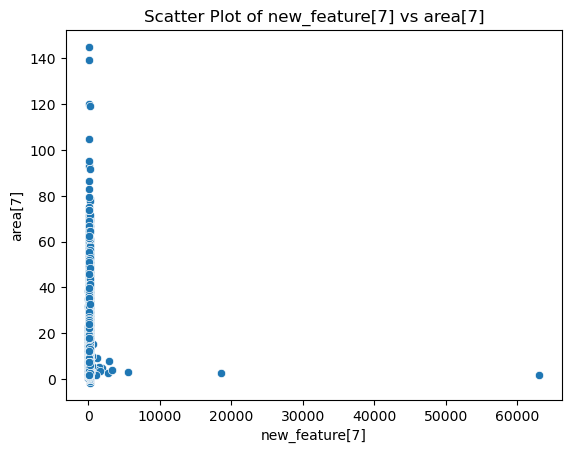

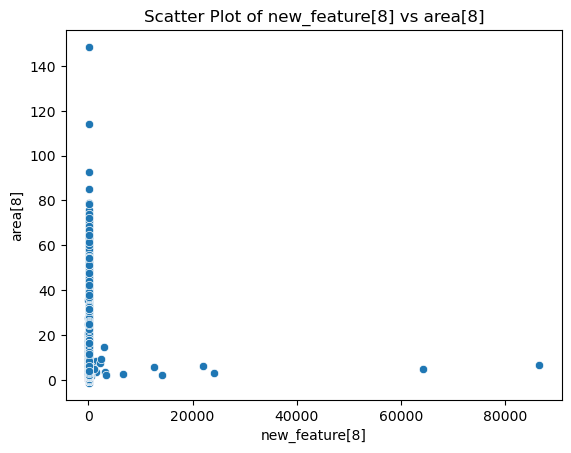

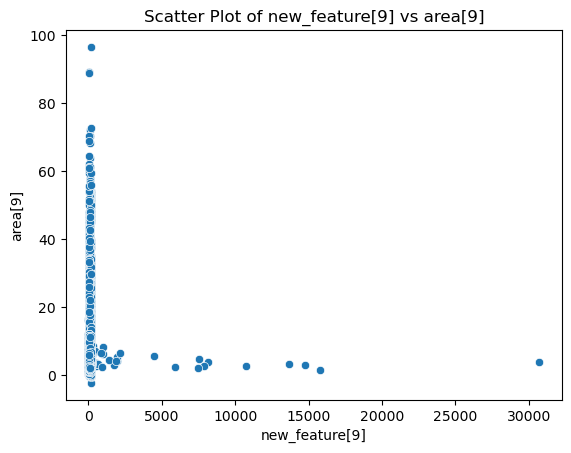

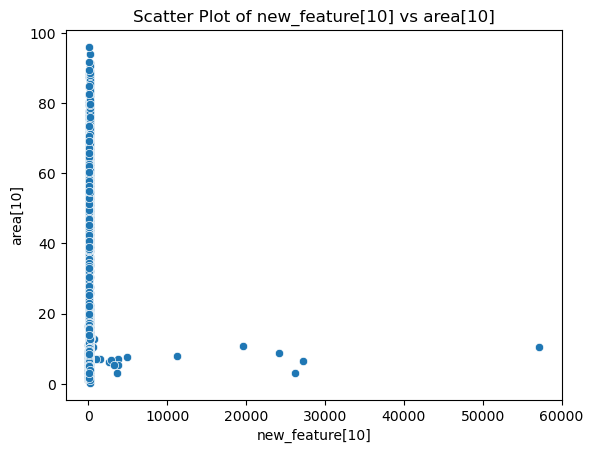

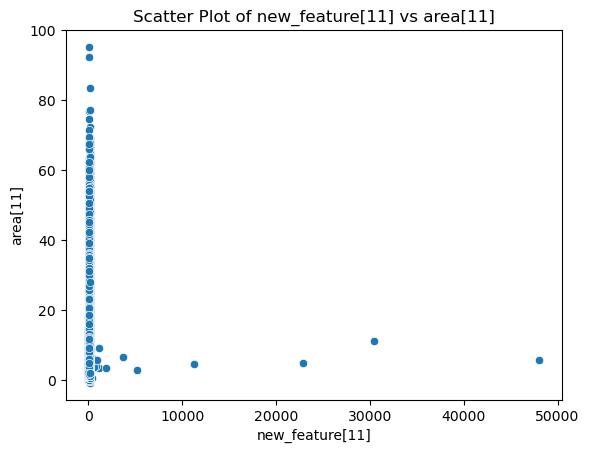

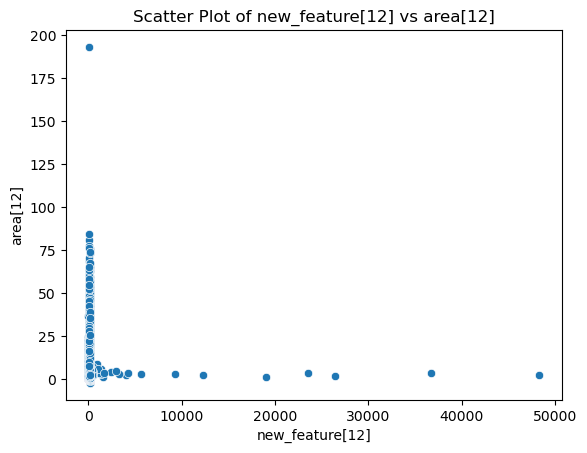

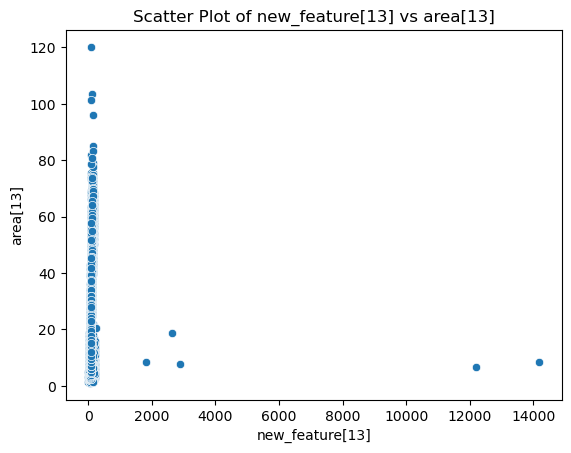

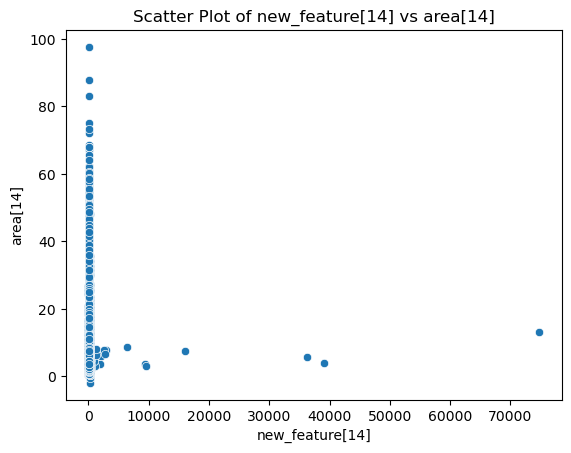

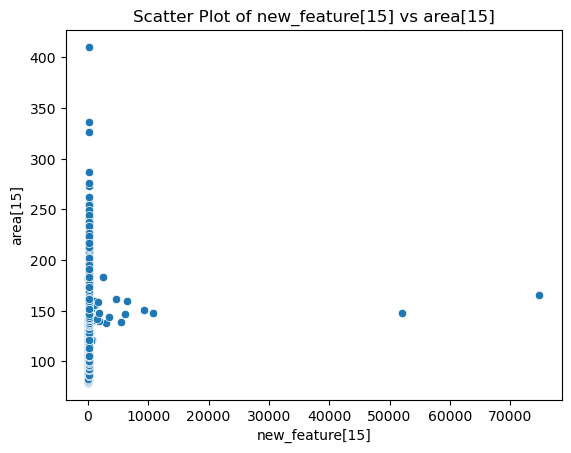

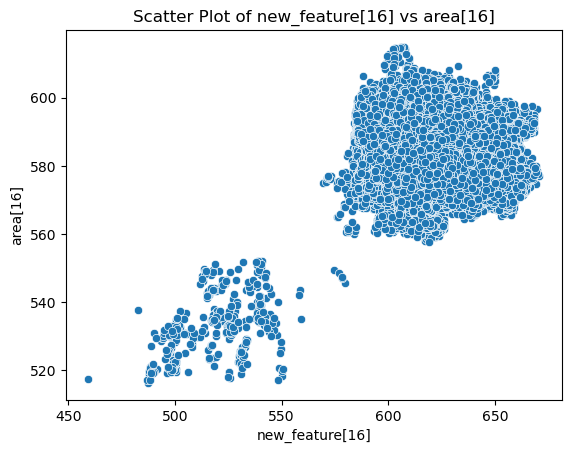

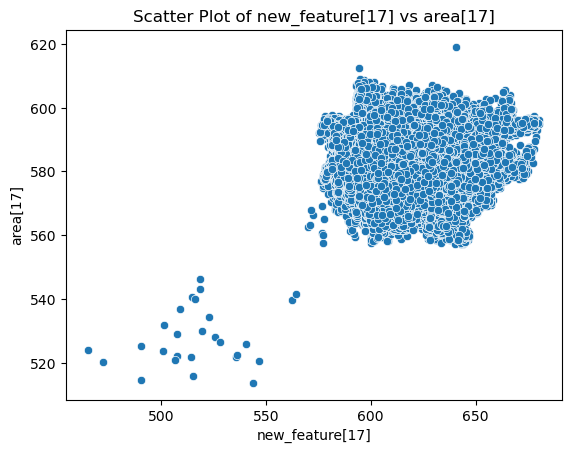

In [13]:
# explore the impact of the synthetic features of pmax, negpmax and tmax on area
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['pmax[%s]' % i, 'negpmax[%s]' % i, 'tmax[%s]' % i, 'rms[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['area[%i]' % i]))
    sns.scatterplot(x='new_feature[%s]' % i, y='area[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs area[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('area[%s]' % i)

    plt.show()

# from above 0,5,16,17

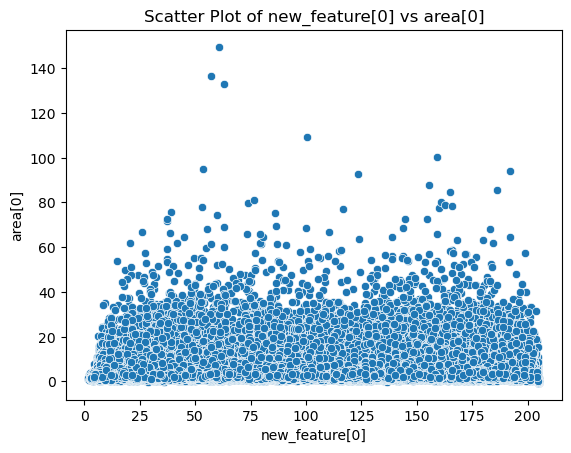

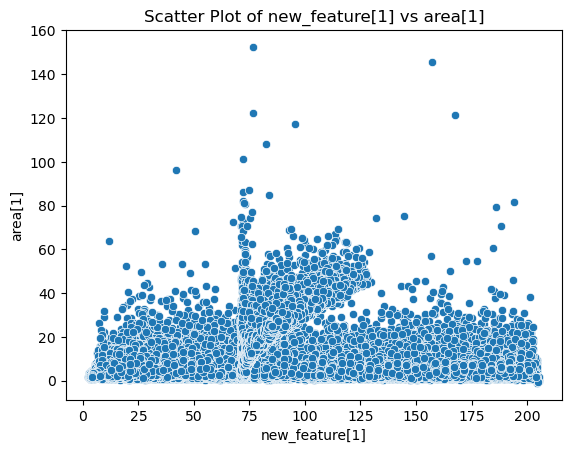

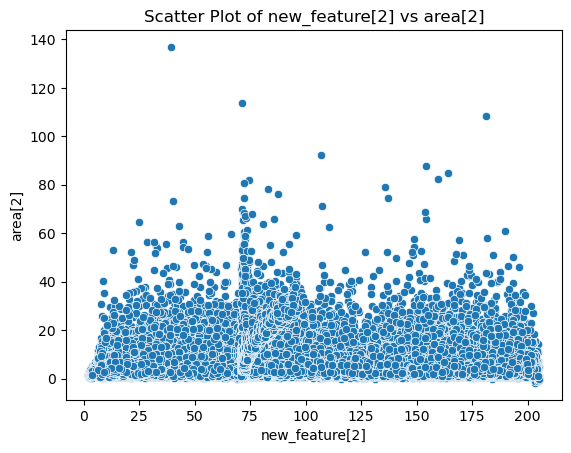

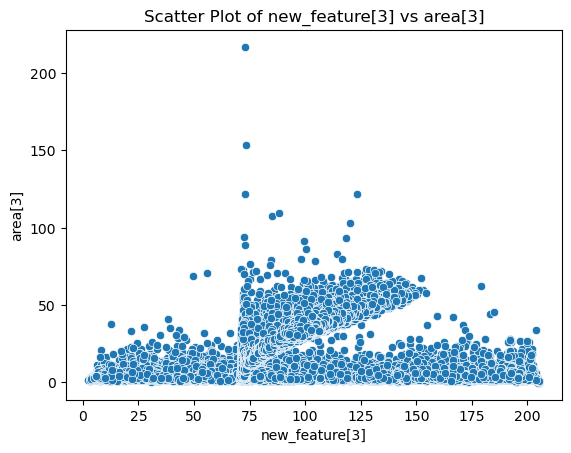

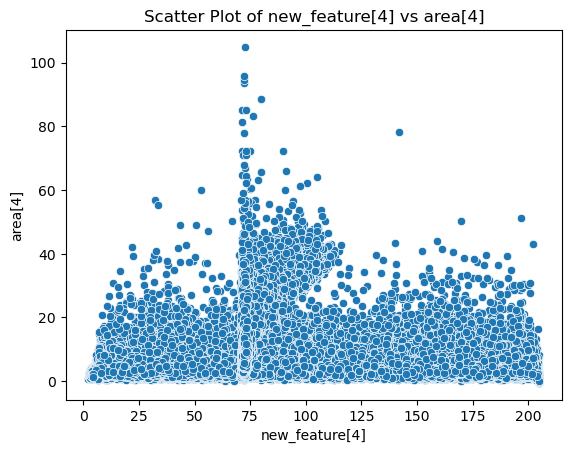

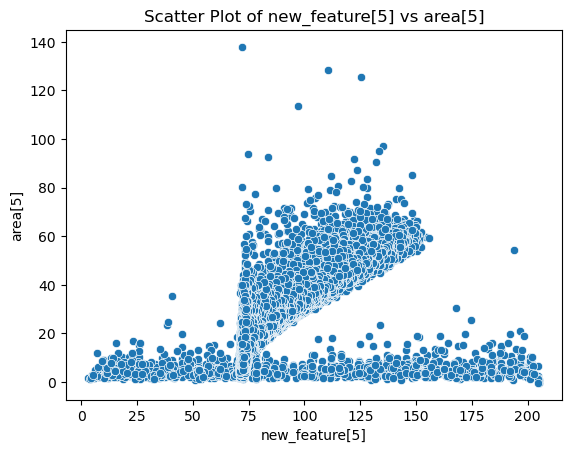

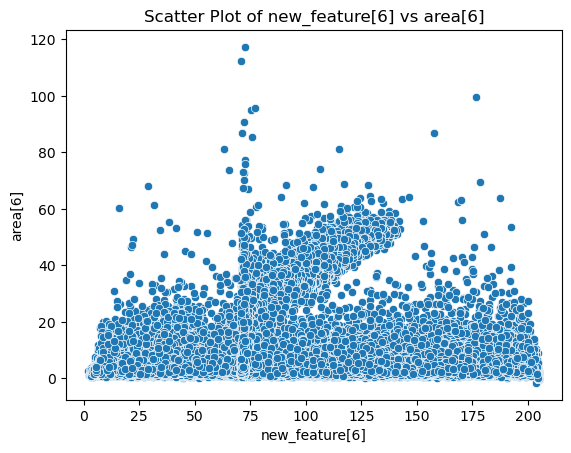

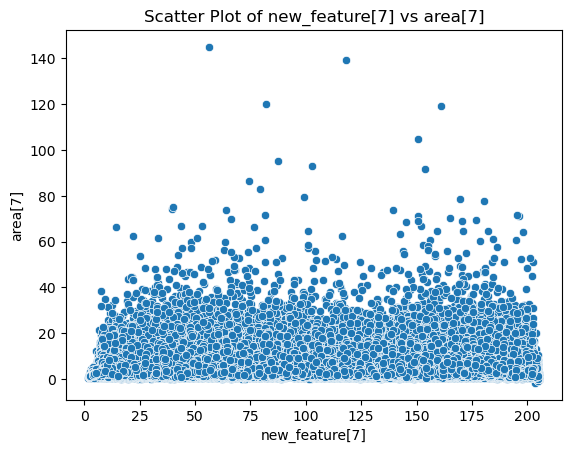

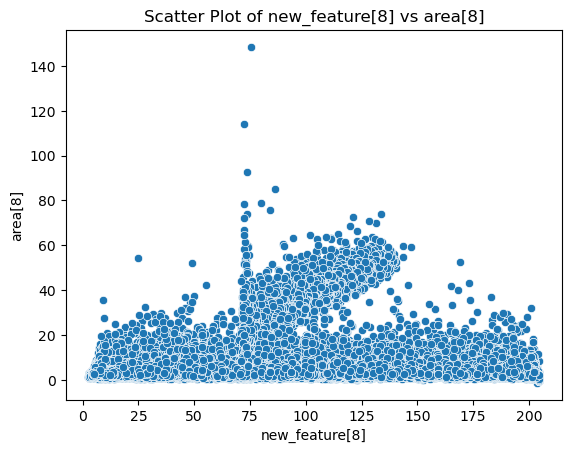

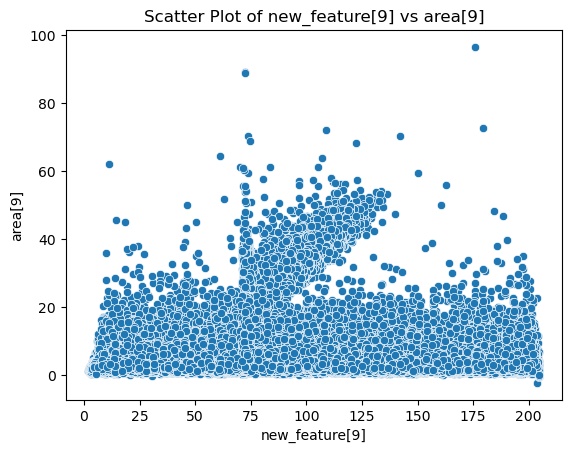

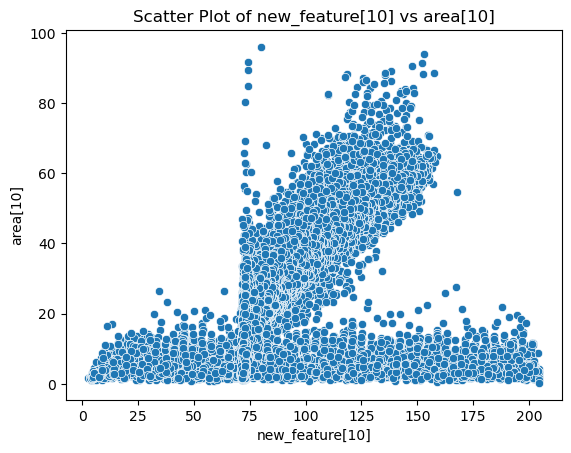

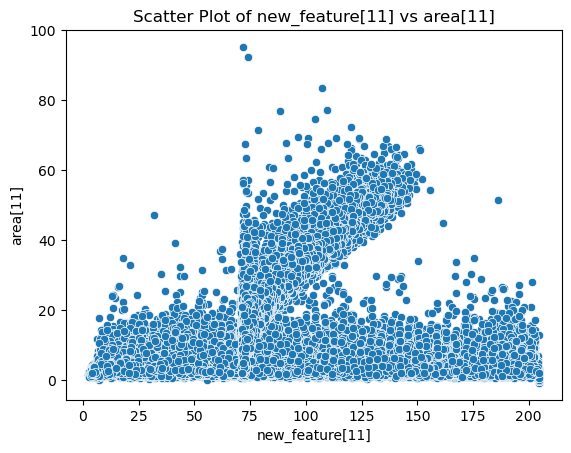

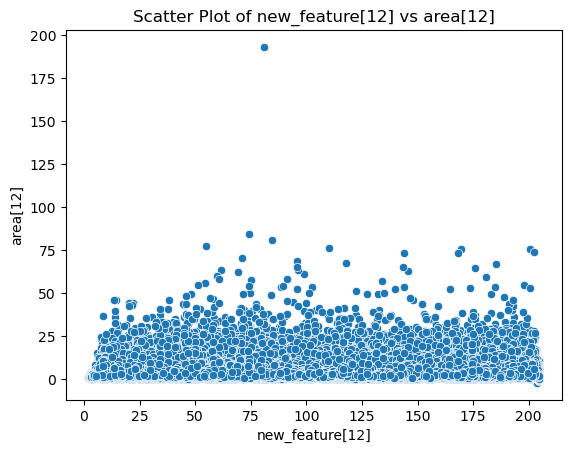

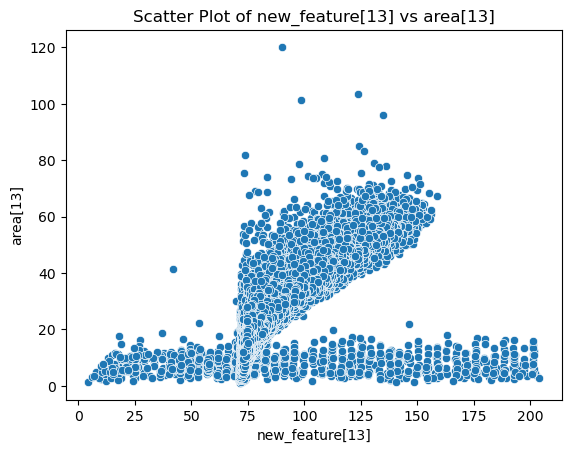

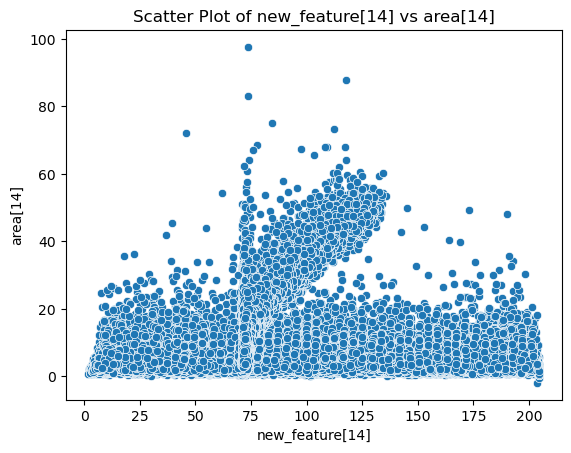

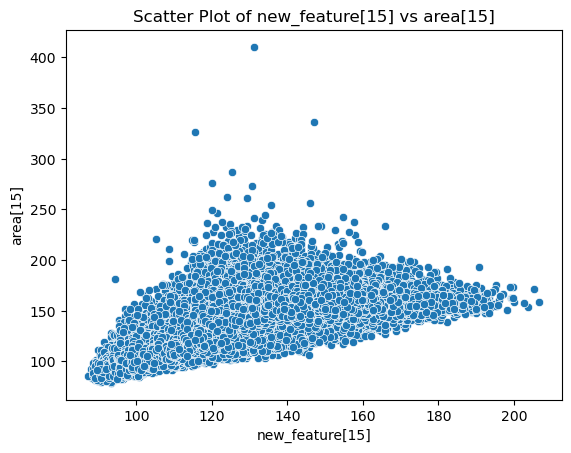

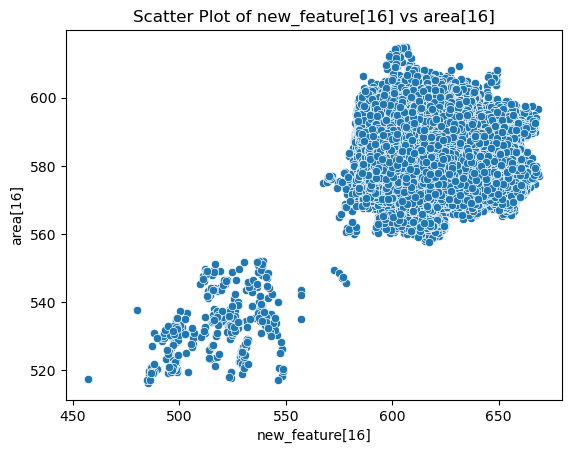

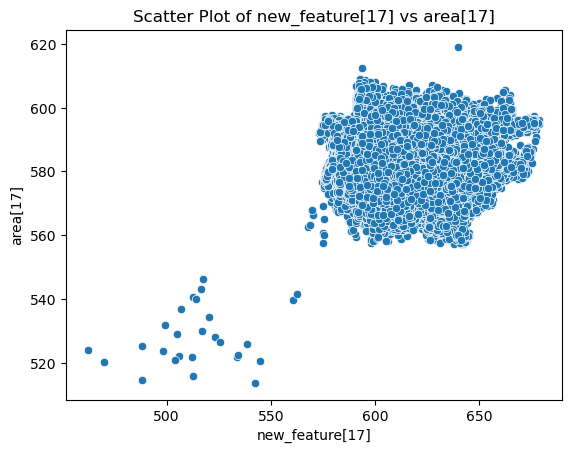

In [14]:
# explore the impact of the synthetic features of pmax, negpmax and tmax on area
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['pmax[%s]' % i, 'tmax[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['area[%i]' % i]))
    sns.scatterplot(x='new_feature[%s]' % i, y='area[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs area[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('area[%s]' % i)

    plt.show()

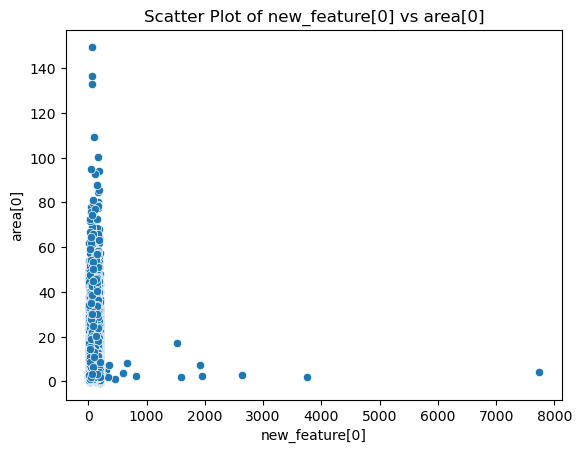

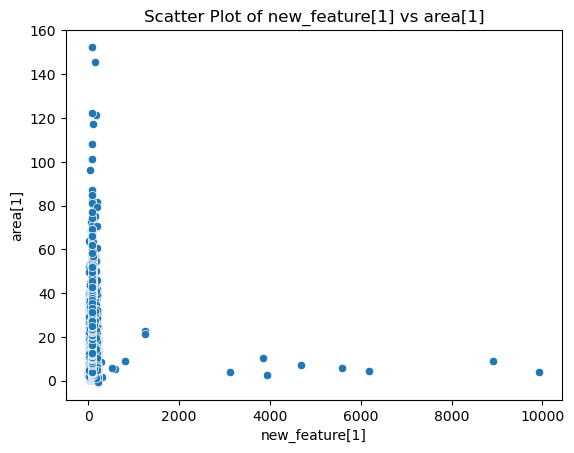

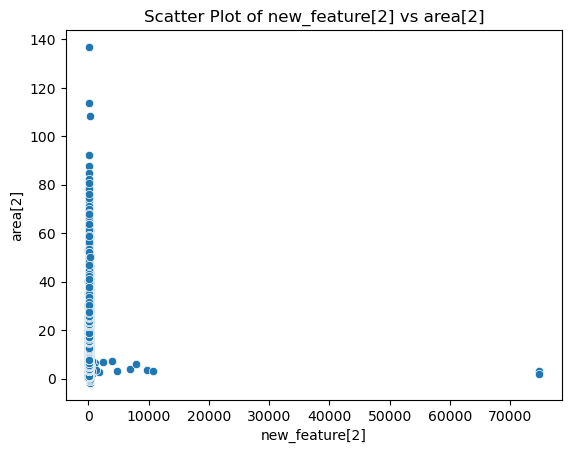

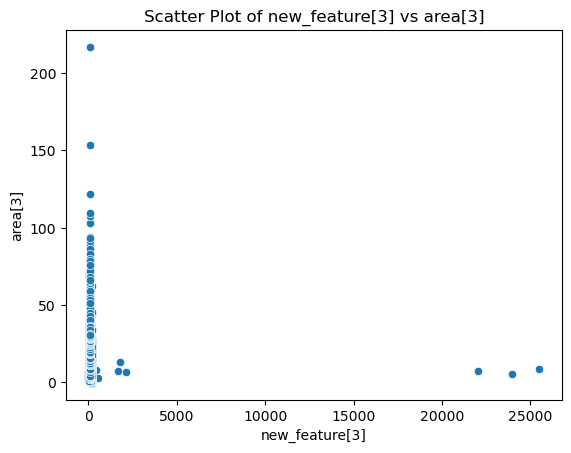

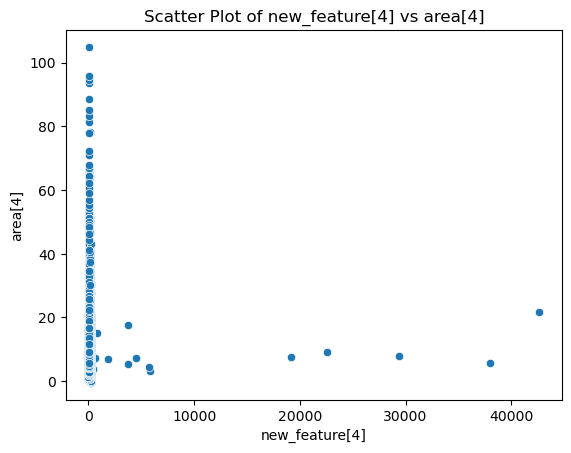

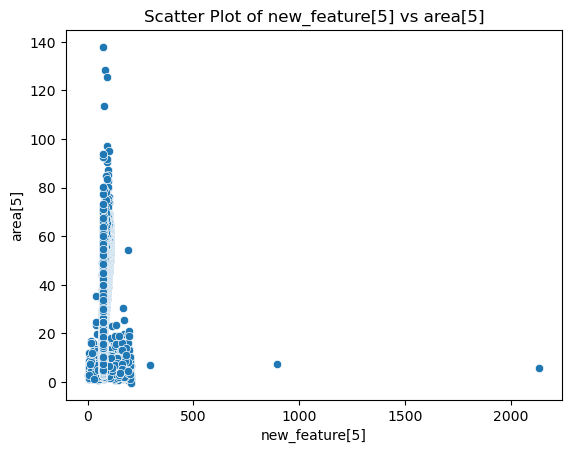

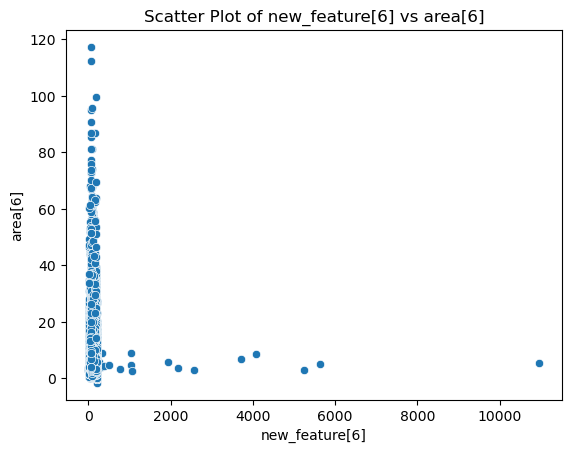

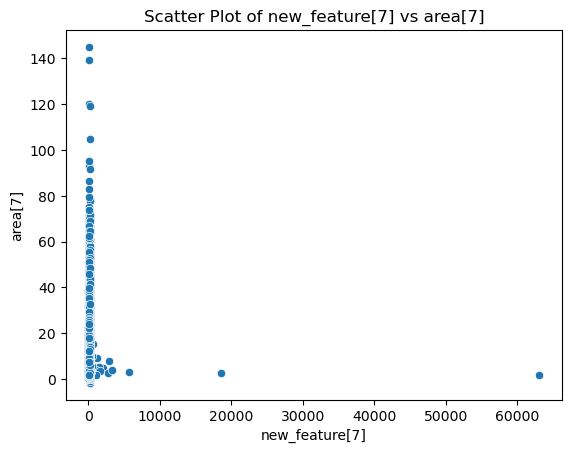

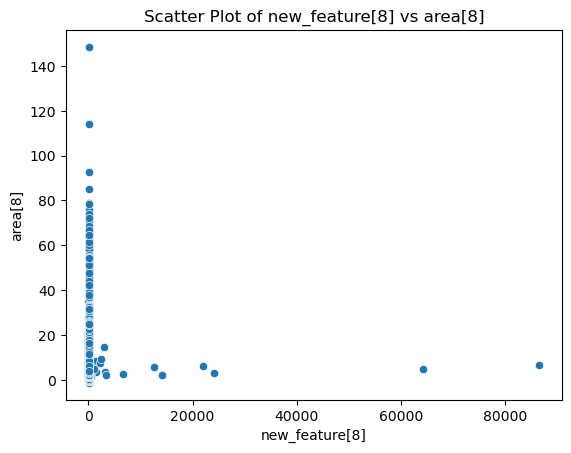

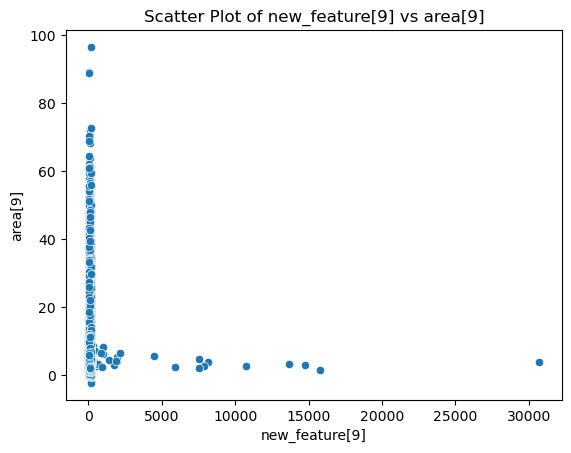

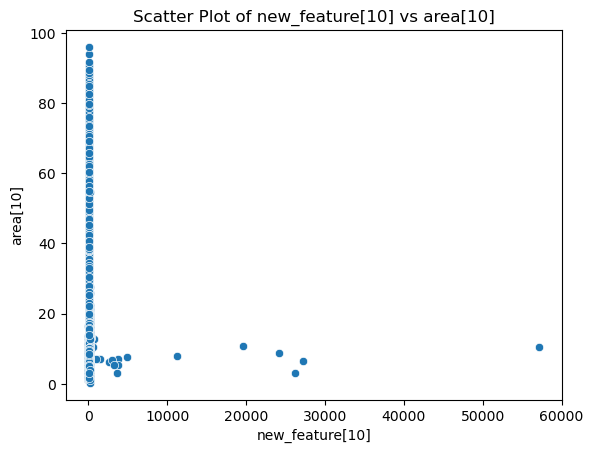

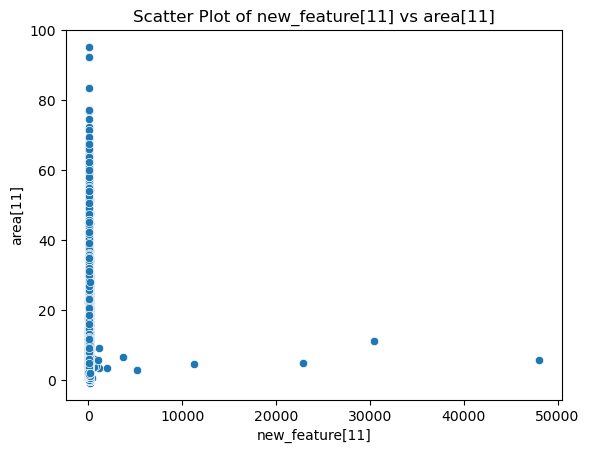

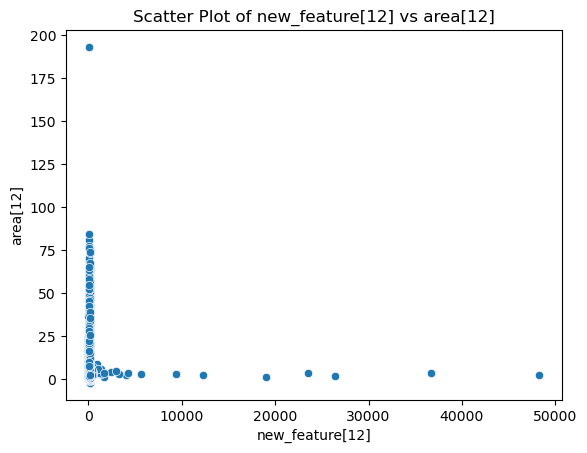

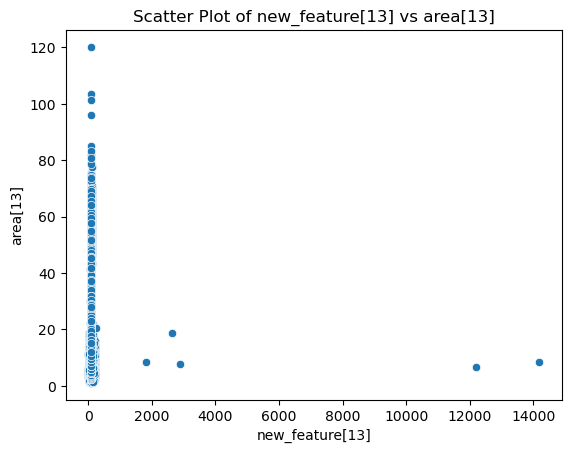

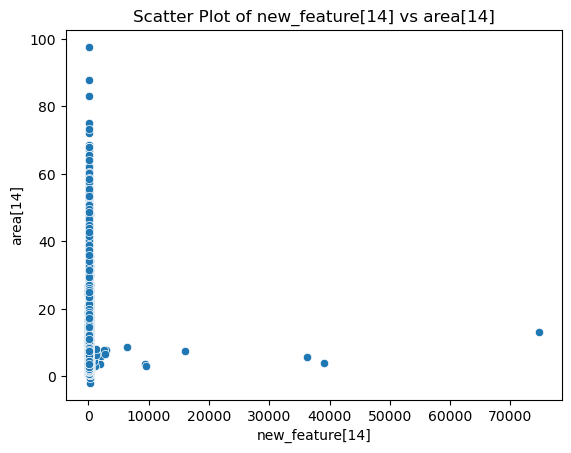

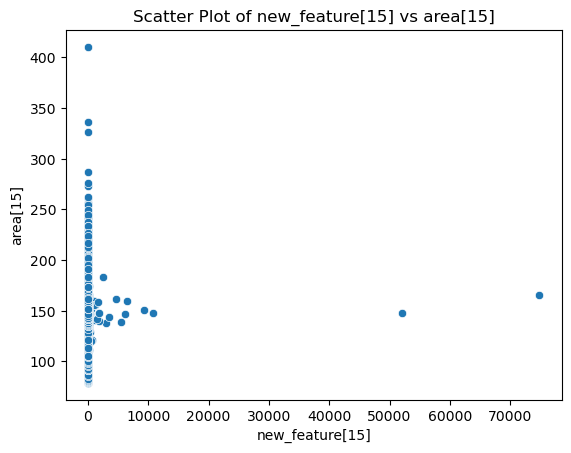

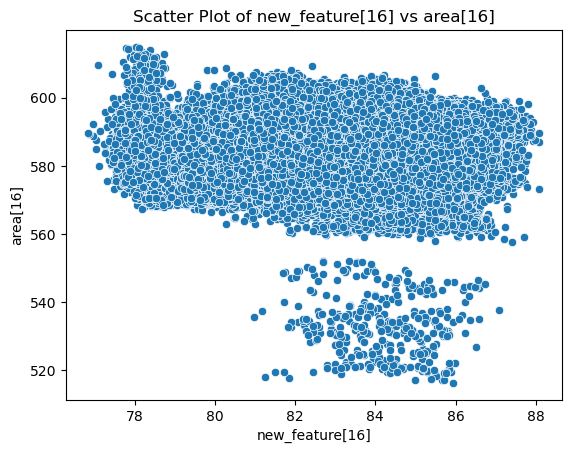

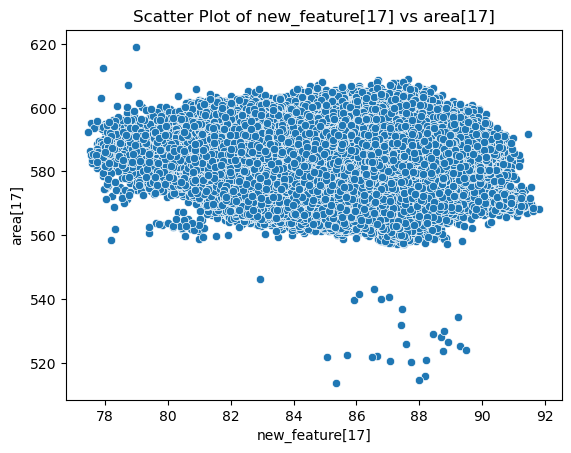

In [15]:
# explore the impact of the synthetic features of pmax, negpmax and tmax on area
for i in range(18):
    new_feature=np.sqrt(np.sum(development[['negpmax[%s]' % i, 'tmax[%s]' % i]]**2, axis=1))
    development["new_feature[%s]" % i] = new_feature
    # print(development["new_feature[%s]" % i].corr(development['area[%i]' % i]))
    sns.scatterplot(x='new_feature[%s]' % i, y='area[%s]' % i, data=development)
    plt.title('Scatter Plot of new_feature[%s] vs area[%s]' % (i, i))
    plt.xlabel('new_feature[%s]' % i)
    plt.ylabel('area[%s]' % i)

    plt.show()

# from above 0,5,15,16,17